# Ingeniería de features, Modelos avanzados e Interpretación de modelos

####  Introduccion:
Properati es un nuevo portal web de propiedades que busca mejorar la experiencia de compra, venta y alquiler de inmuebles en América Latina.

Para el usuario que busca su próximo inmueble en alquiler o venta, Properati ofrece una serie de herramientas adicionales que le permitirán encontrar su propiedad deseada teniendo en cuenta la información relevante del barrio/ciudad como ser los precios promedio por metro cuadrado, cantidad y tipo de ofertas de propiedades y gráficos históricos.

Dentro de los servicios que la empresa brinda, se encuentran las operaciones de compra y venta de inmuebles. Para esto, se necesita una correcta tasacion de la propiedad ya que:

En el caso de la persona que compra, muy probablemente tenga que solicitar financiación hipotecaria para su adquisición y para ello la tasación es requisito indispensable.

En el caso de la persona que vende, también le será muy útil la tasación ya que:

* Es la única forma de saber cuánto cuesta tu vivienda en el mercado
* Es una tarifa oficial e indiscutible
* Tienes en tus manos una potente herramienta que te ayudará a fijar un precio justo para tu casa.

#### Objetivo de negocio:

Una de los servicios prestado por la empresa properati es la tasacion  de propiedades para la venta, por este motivo se decidio aumentar la presicion de esta herramienta para poder fidelizar clientes y aumentar en un 10% las transacciones de venta, respecto a las del año pasado.

#### Se solicita: 

Generar un modelo que tenga un buen desempeño para predecir el precios de las propiedades.

#### Objetivo de mineria de datos:

- Desarrollar una exploración de datos que permita identificar las variables más relevantes para la construcción del modelo de regresion.
- Deteccion y eliminacion de outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
- Desarrollar varios modelos,  que pueda ser utilizado por Properati para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal)
- Comparar los resultados de los dos modelos desarrollados, concluyendo sobre cuál de ellos debería ser utilizado por Properati.

In [1]:
# Librerias que seran utiles.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Cargamos el dataset con el que trabajaremos.

In [2]:
#Carga del dataset
properati_df= pd.read_csv("C:/Users/gabri/OneDrive/Documentos/Data-science/DS_Proyecto_01_Datos_Properati.csv")

Podemos observar que la estructura del dataset es un  dataframe.
#### Su contenido:

In [3]:
properati_df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


La estructura del Dataframe con el que trabajaremos esta compuesta por 19 columnas y 146660 filas.

In [4]:
properati_df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
properati_df.shape

(146660, 19)

In [6]:
properati_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
properati_df.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


#### Estadistica basica.
Utilizaremos la función "Describe" de nuestro dataset para corroborar la media, el desvio, cuartiles, minimos y maximos.

In [8]:
properati_df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


.Podemos apreciar que hay una cantidad de datos faltantes en lat, lon, bathrooms, surface_total y surface_covered

.Tambien se puede observar que en algunas variables el desvio es mayor que la media pudiendo ser un indicio de que haya valores atipicos, mas adelante lo corroboraremos con un grafico Boxplot.

### Nombre de las columnas y la cantidad de valores de cada una:

In [9]:
properati_df.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

A traves de la funcion count podemos observar que algunas caracteristicas de las propiedades no tienen 146660 valores, lo que nos permite confirmar que algunas variables tienen valores nulos.

### Descripcion de los datos:
###### 1- start_date - Fecha de alta del aviso.
###### 2- end_date - Fecha de baja del aviso.
###### 3- created_on - Fecha de alta de la primera versión del aviso.
###### 4- lat - Latitud.
###### 5- lon - Longitud.
###### 6- l1 - Nivel administrativo 1: país.
###### 7- l2 - Nivel administrativo 2: usualmente provincia.
###### 8- l3 - Nivel administrativo 3: usualmente ciudad.
###### 9- rooms - Cantidad de ambientes (útil en Argentina).
###### 10- bathrooms - Cantidad de baños.
###### 11- surface_total - Superficie total en m².
###### 12- surface_covered - Superficie cubierta en m².
###### 13- price - Precio publicado en el anuncio.
###### 14- currency - Moneda del precio publicado.
###### 15- title - Título del anuncio.
###### 16- description - Descripción del anuncio.
###### 17- property_type - Tipo de propiedad (Casa, Departamento, PH).
###### 18- operation - Tipo de operación (Venta, Alquiler).
###### 19- bedrooms - Cantidad de dormitorios

#### Criterio de seleccion de propiedades y zona:

In [10]:
# Cuantas propiedades hay de cada tipo?
properati_df.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [11]:
# Cantidad de propiedades expresado en porcentajes
properati_df.property_type.value_counts()/properati_df.shape[0]*100

Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64

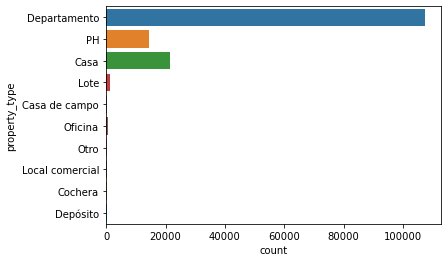

In [12]:
sns.countplot(data=properati_df, y = "property_type")

In [13]:
# Cantidad de propiedades por zona expresado en porcentajes
properati_df.l2.value_counts()/properati_df.shape[0]*100

Capital Federal             63.097641
Bs.As. G.B.A. Zona Norte    16.556662
Bs.As. G.B.A. Zona Sur      11.709396
Bs.As. G.B.A. Zona Oeste     8.636302
Name: l2, dtype: float64

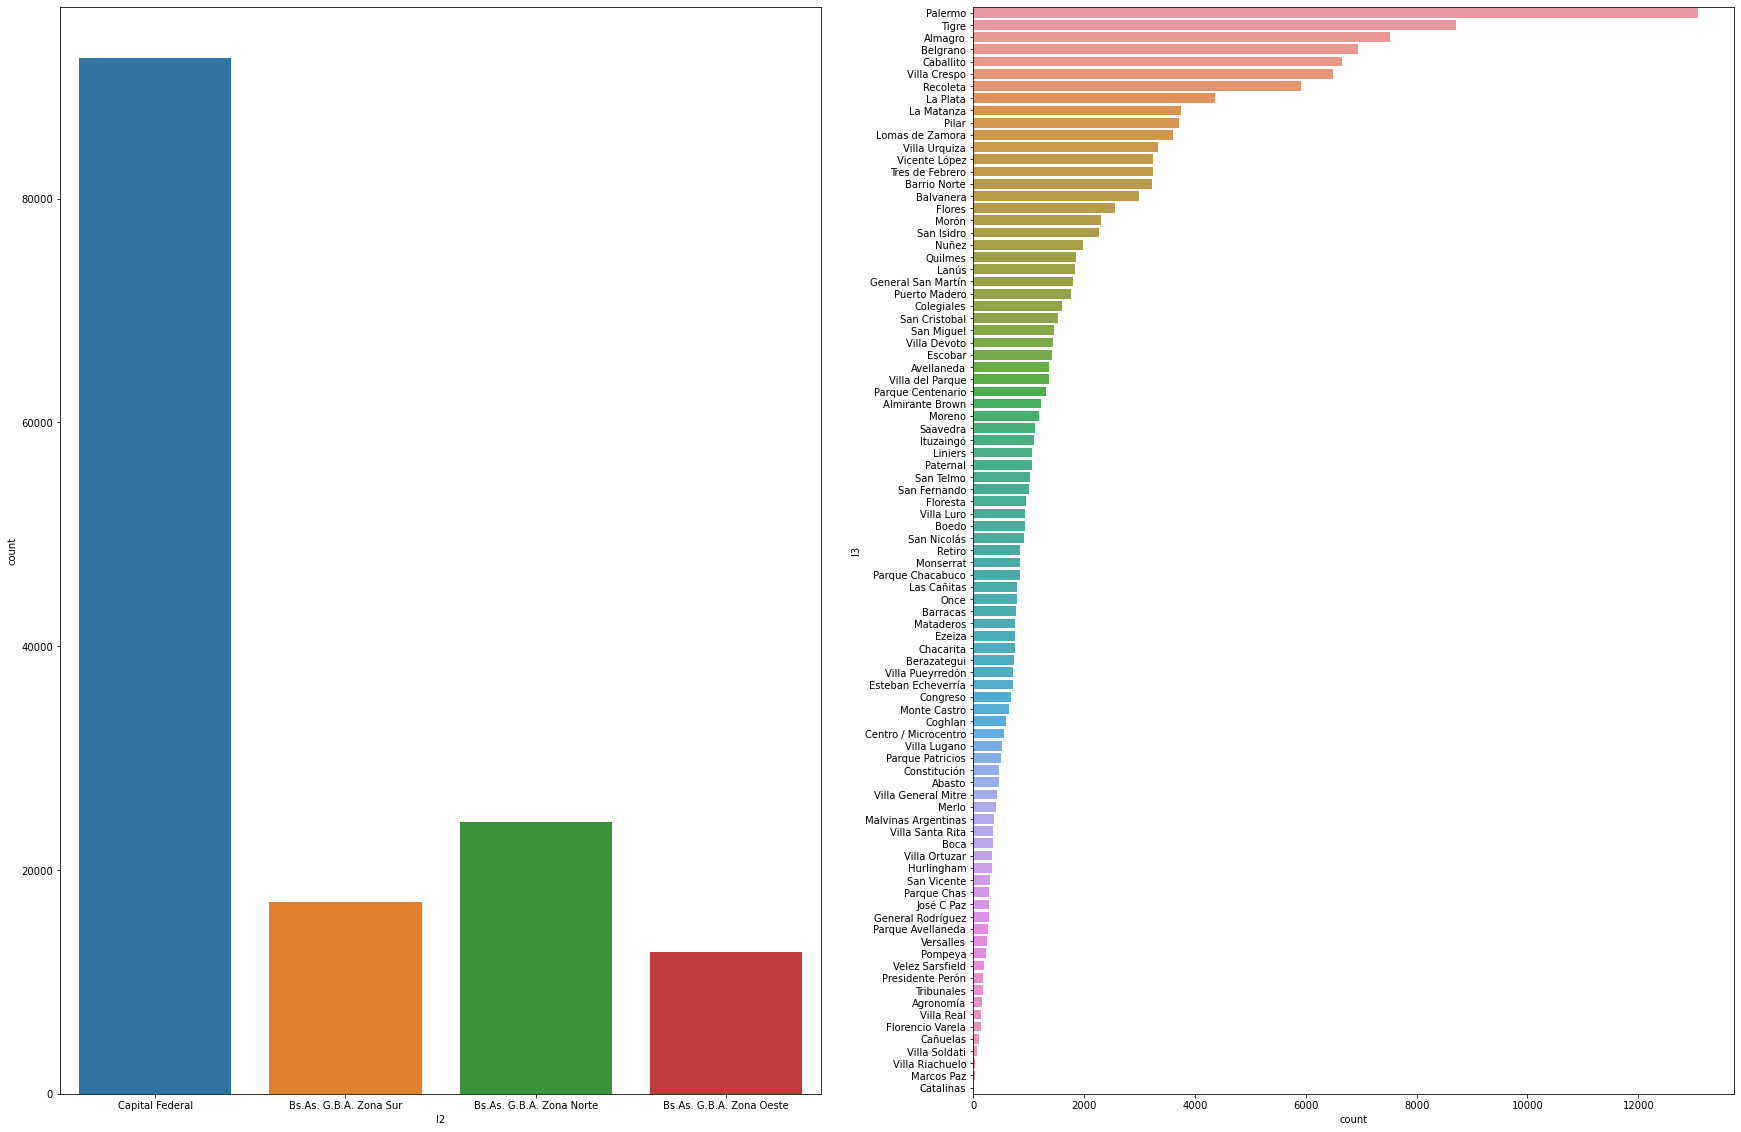

In [14]:
# Grafico con la cantidad de propiedades que tienen a la venta cada zona y cada barrio.
plt.figure(figsize = (30,20))
plt.subplot(1,2,1)
sns.countplot(data= properati_df,x = "l2")

plt.subplot(1,2,2)
sns.countplot(data=properati_df, y="l3", order = properati_df['l3'].value_counts().index)
#sns.countplot(data = properati_data, y = "l3")

#### Criterio de seleccion de propiedades y zona:
Segun los datos obtenidos y los graficos realizados, se llego a la conclusion que las 3 propiedades que predominan son:

* PH (13923 propiedades, representando casi el 10% de nuestro dataframe)

* Departamento (92087 propiedades, representando el 73% de nuestro dataframe)

* Casa (16040 propiedades, representando casi el 14% de nuestro dataframe)

* Solamente se trabajara con la zona de Capital Federal ya que el 63% de las propiedades estan ubicadas en esa zona.

In [15]:
#seleccionamos las propiedades casa,departamento y PH ubicadas en Capital Fedderal.
data_type =  properati_df[ properati_df["property_type"].isin(["Departamento","Casa","PH"])]
prop_data = data_type[data_type["l2"] == "Capital Federal"]

prop_data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


La estructura del Dataframe con el que trabajaremos se redujo a 19 columnas y 91485 filas.

#### Identificación de filas con datos duplicados.

In [16]:
duplicado = prop_data.duplicated()
print(duplicado.any())
print(prop_data[duplicado])

True
        start_date    end_date  created_on        lat        lon         l1  \
7       2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061  Argentina   
9       2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612  Argentina   
40      2019-10-17  2019-10-22  2019-10-17 -34.597613 -58.416688  Argentina   
48      2019-10-17  2019-10-27  2019-10-17 -34.597613 -58.416688  Argentina   
51      2019-10-17  2019-11-15  2019-10-17 -34.577746 -58.431085  Argentina   
...            ...         ...         ...        ...        ...        ...   
146162  2019-07-31  2019-08-14  2019-07-31 -34.578066 -58.426532  Argentina   
146171  2019-07-31  2019-08-14  2019-07-31 -34.578066 -58.426532  Argentina   
146173  2019-07-31  2019-09-04  2019-07-31 -34.575165 -58.431149  Argentina   
146497  2019-07-31  2019-09-04  2019-07-31        NaN        NaN  Argentina   
146546  2019-07-31  2020-01-17  2019-07-31        NaN        NaN  Argentina   

                     l2                l3  roo

Se considera como duplicados a las filas que tienen los mismos valores para cada columna en el mismo orden, la eliminación de estos duplicados aseguramos que mejorara el rendimiento de los modelos predictivos.

In [17]:
# Eliminamos valores duplicados
print(prop_data.shape)
prop_data.drop_duplicates(inplace=True)
print(prop_data.shape)

(91485, 19)
(89874, 19)


<ipython-input-17-38559aabcb23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_data.drop_duplicates(inplace=True)


---

In [18]:
# Concentracion de propiedades que hay por zona.
prop_data.l2.value_counts()

Capital Federal    89874
Name: l2, dtype: int64

In [19]:
# Cuantas propiedades hay de cada tipo?
prop_data.property_type.value_counts()

Departamento    77629
PH               9574
Casa             2671
Name: property_type, dtype: int64

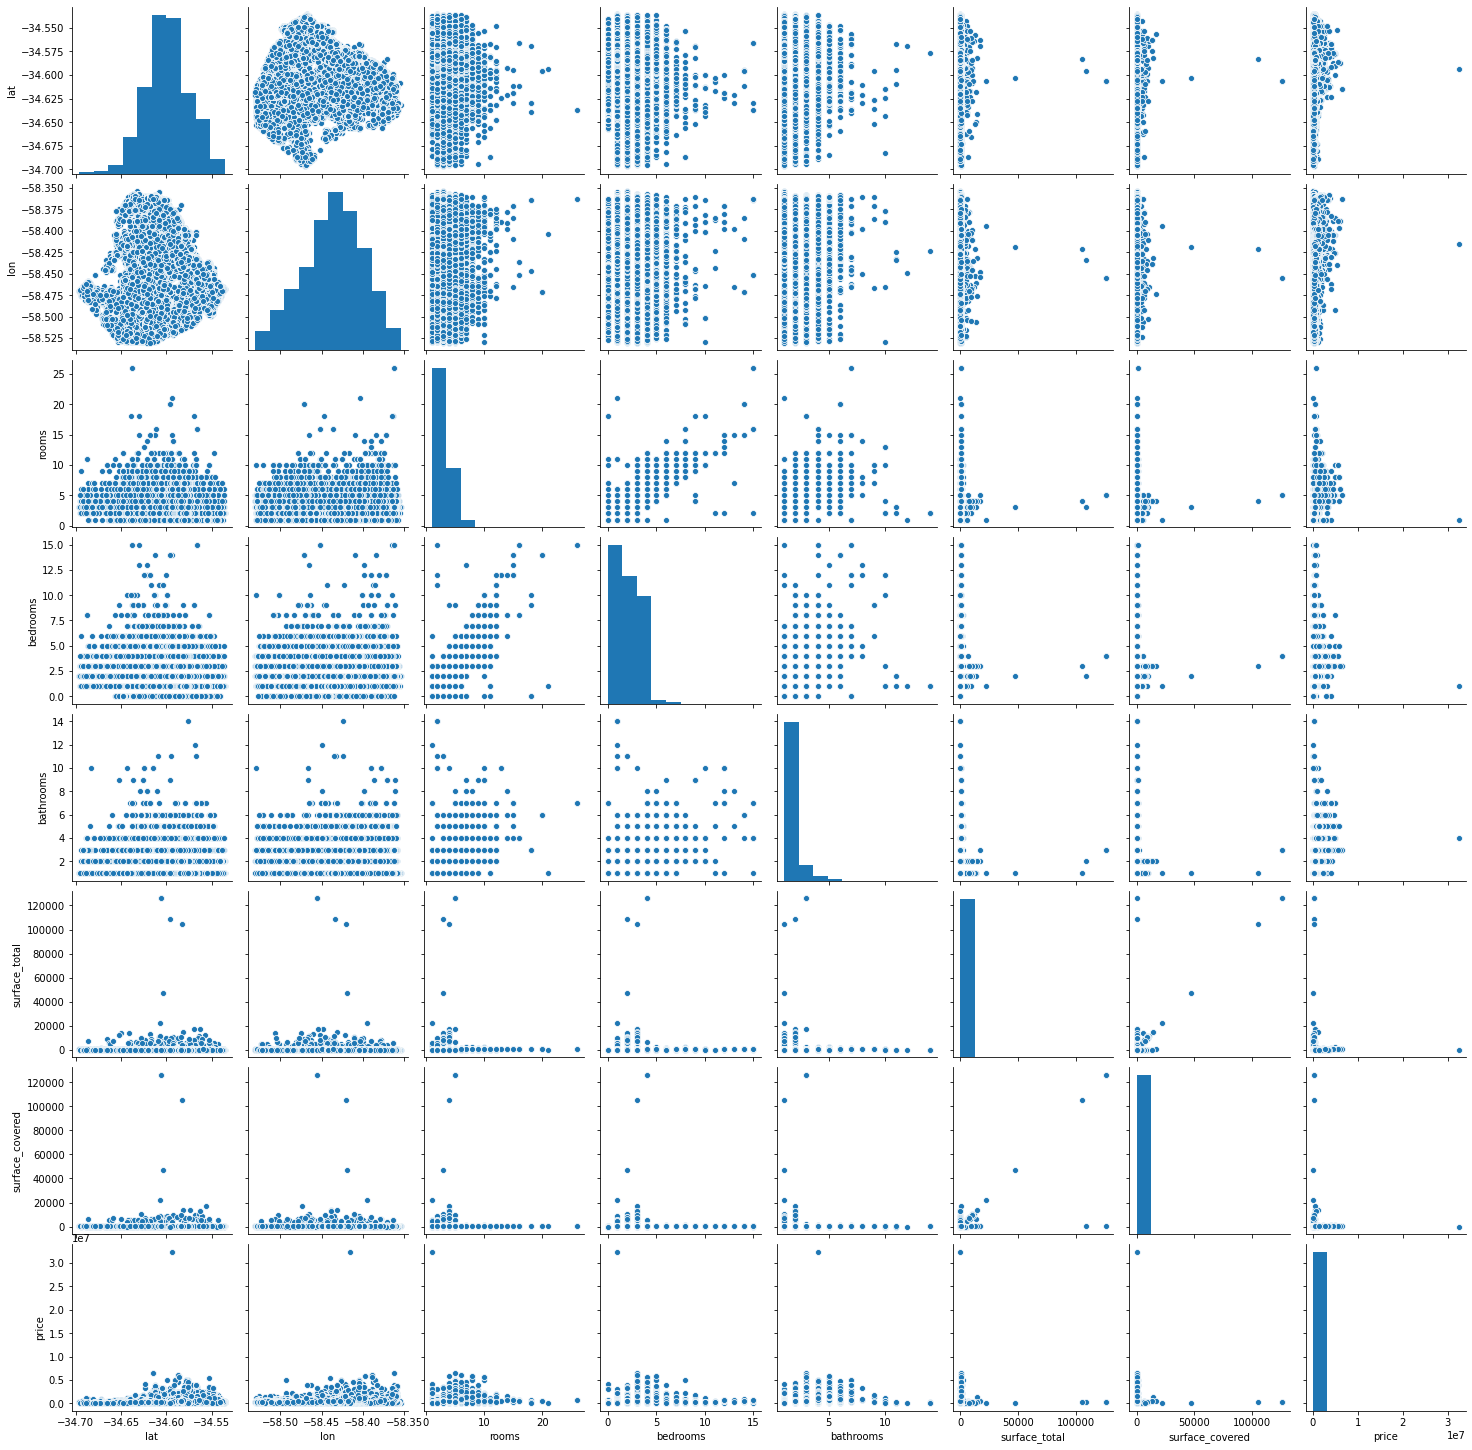

In [20]:
# Haremos un grafico que sea general para todas las variables y ver cuales de ellas, puedan tener algun tipo de relacion,
sns.pairplot(prop_data)

### Conclusion: 

Algunos valores atípicos dificultan el análisis de los gráficos, aunque son muy pocos valores y lo mejor seria estudiarlos para que no interfieran en nuestro análisis. Los datos que nos proporcionarán room, bedrooms y bathroom pienso que son fundamentales ya que son parte de las características de la propiedad. Por último otros de los datos que ayudarán seran surface_total y surface_covered, estos datos al igual que los anteriores hacen parte de las características de la propiedad, mas especificamente a su tamaño.

Las variables lat y lon también serán eliminadas, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad. Cabe aclara que solamente se eliminaran aquellas propiedades que se repitan mas de 5 veces, ya que en alguno de los casos puede tratarse de varios departamentos en una misma torre

In [21]:
### Chequeamos que efectivamente muchos valores de lat y lon se repiten.
conteo_puntos = prop_data.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 5].sort_values(ascending=False).head(10)

lat         lon       
-34.597256  -58.445498    254
-34.578066  -58.426532    225
-34.596762  -58.421589    204
-34.579326  -58.455819    200
-34.587383  -58.397276    188
-34.589767  -58.420728    168
-34.542750  -58.460145    165
-34.618150  -58.394095    160
-34.602133  -58.466831    156
-34.601364  -58.430143    149
dtype: int64

In [22]:
# Eliminamos las columnas que no vamos a utilizar
col = prop_data.drop(columns = ["start_date","end_date","created_on","l1","l2","currency","title","description","operation_type","l3"])
col

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


La estructura del Dataframe con el que trabajaremos esta compuesta por 9 columnas y se redujo a 91485 filas.

---

#### Se realizará un ajuste de las variables "surface_total" y "surface_covered", eliminando aquellas propiedades que tengan una superficie cubierta mayor a la superficie total

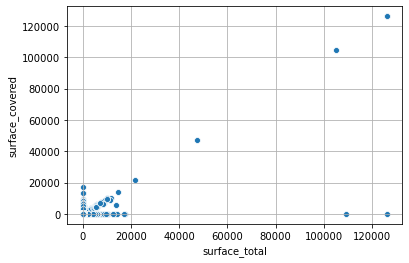

In [23]:
sns.scatterplot(data=col, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

In [24]:
# eliminamos las propiedades donde el valor de la superficie cubierta es mayor al de la superficie total.
col.drop(col.loc[col['surface_covered'] > col['surface_total']].index,inplace=True ,axis=0)

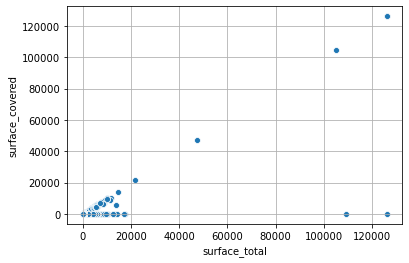

In [25]:
sns.scatterplot(data=col, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

---

#### Detección de valores faltanes : 
¿Existen valores faltantes en nuestro dataset?

En caso de que estemos en presencia de valores faltantes:

¿Cuantos valores hay? 

¿cual es porcentaje que representan esos valores en nuestro dataset? 

¿En que tipo de propiedad hay mas valores faltantes?  

¿Sera necesario imputarles algun valor? ¿pueden ser eliminados?

In [26]:
# ¿Hay valores ausentes?
col.isna().sum()

lat                4376
lon                4390
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

In [27]:
# porcentaje de valores faltantes por columna.
col.isna().sum()/col.shape[0]*100

lat                 4.910564
lon                 4.926274
rooms               0.000000
bedrooms            0.000000
bathrooms           2.400296
surface_total       9.781852
surface_covered    10.126355
price               0.000000
property_type       0.000000
dtype: float64

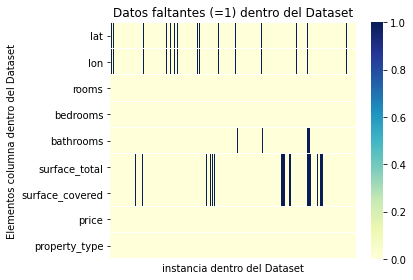

In [28]:
# graficamente podemos ver donde estan los datos faltantes dentro del Dataset
dat= col.isnull()
heat = sns.heatmap(dat.T, cmap = "YlGnBu", xticklabels = False)
plt.title("Datos faltantes (=1) dentro del Dataset")
plt.xlabel("instancia dentro del Dataset")
plt.ylabel("Elementos columna dentro del Dataset")
plt.tight_layout()

In [29]:
# ¿en que tipo de propiedad hay mas valores faltantes en la columna de bathrooms?
col.bathrooms.isnull().groupby([col['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,136
1,Departamento,1915
2,PH,88


In [30]:
# ¿en que tipo de propiedad hay mas valores faltantes en la columna de surface_total?
col.surface_total.isnull().groupby([col['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,420
1,Departamento,8255
2,PH,42


In [31]:
# ¿en que tipo de propiedad hay mas valores faltantes en la columna de surface_covered?
col.surface_covered.isnull().groupby([col['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,430
1,Departamento,8521
2,PH,73


In [32]:
# ¿en que tipo de propiedad hay mas valores faltantes en la columna de surface_covered?
col.lat.isnull().groupby([col['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,52
1,Departamento,4106
2,PH,218


In [33]:
# ¿en que tipo de propiedad hay mas valores faltantes en la columna de surface_covered?
col.lon.isnull().groupby([col['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,54
1,Departamento,4117
2,PH,219


#### Conclusion:
Existen 2139 datos ausentes en la variable bathrooms (representando el 2.4%)

En la variable surface_total existen 8717 datos ausentes (cerca del 10%)

En la variable surface_covered, tenemos 9024 datos faltantes (representando el 10%)

En la varible lat existen 4376 datos ausentes (casi el 5%).

En la variable lon hay 4390 valores faltantes(casi el 5%).

La mayor cantidad de valores faltantes estan en los departamentos.
 
El porcentaje de datos faltantes es reducido, seria conveniente tener el conocimiento del origen de estos valores falatantes. Ya que no contamos con la persona que pueda brindarnos esta informacion y de acuerdo a lo que solicita, se llevara a cabo la imputacion de los valores faltantes utilizando el valor medio de los vecinos más cercanos que se encuentran en el conjunto.

Se llevarán a cabo dos métodos de imputación, uno será estadístico y el otro con KNN.

In [34]:
X= col[["rooms","bedrooms","bathrooms","surface_total","surface_covered","lon","lat"]]
y=col[["price"]]
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,lon,lat
0,7.0,7.0,2.0,140.0,140.0,-58.384949,-34.605880
1,2.0,1.0,2.0,70.0,58.0,-58.412110,-34.624056
2,2.0,1.0,1.0,45.0,45.0,-58.427474,-34.593569
3,2.0,1.0,1.0,85.0,50.0,-58.436754,-34.581294
5,2.0,1.0,1.0,56.0,56.0,-58.441239,-34.593779


#### Imputación estadística.

In [35]:
tree = DecisionTreeRegressor()
resultado = []
from sklearn import metrics
from sklearn.metrics import mean_squared_error
tipos = ['mean', 'median', 'most_frequent', 'constant']
for t in tipos:
    imputer=SimpleImputer(strategy=t)
    imputer.fit(X)
    X_trans= imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    y_pred = tree.predict(X_trans)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("La estrategia utilizada--->",t)
    print("RMSE segun el tipo de estrategia:",RMSE)
    print("----------------------------------------")

La estrategia utilizada---> mean
RMSE segun el tipo de estrategia: 110072.45385436852
----------------------------------------
La estrategia utilizada---> median
RMSE segun el tipo de estrategia: 110874.3453298481
----------------------------------------
La estrategia utilizada---> most_frequent
RMSE segun el tipo de estrategia: 111092.0286728623
----------------------------------------
La estrategia utilizada---> constant
RMSE segun el tipo de estrategia: 99802.76427923974
----------------------------------------


In [36]:
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 0


El uso de constant es el que mejores resultados otorga, aunque no es una diferencia tan elevada con respecto a los otros tipos de estrategia.¶

#### Imputación con KNN

In [43]:
from sklearn.impute import KNNImputer

In [44]:

# El knn con mejor rendimiento se obtiene con 6 vecinos, debido a la demora de ejecutar estas lineas, solo se dejara el numero 6.
vecinos = [6]
for v in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    X_knn= KNN_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("La cantidad de vecinos utilizados--->",v)
    print("RMSE segun el tipo de estrategia:",RMSE)
    print("----------------------------------------")

La cantidad de vecinos utilizados---> 6
RMSE segun el tipo de estrategia: 106457.56498263891
----------------------------------------


In [45]:
print('Missing: %d' % sum(np.isnan(X_knn).flatten()))

Missing: 0


La cantidad de vecinos igual a 6 otorga un resultado, muy similar al  resultado obtenido anteriormente seleccionando "constant" del SimpleImputer . Por lo tanto será el método seleccionado para llevar a cabo la imputación de valores faltantes.

In [46]:
# Imputacion de valores cercanon a traves de knn_imputer de las columnas bathrooms, surface_total y surface_covered
KNN_imputer = KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(col.iloc[:,0:2])
col.iloc[:,0:2]=KNN_imputer.transform(col.iloc[:,0:2])

In [47]:
# Imputacion de valores cercanon a traves de knn_imputer de las columnas lat y lon
KNN_imputer = KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(col.iloc[:,4:7])
col.iloc[:,4:7]=KNN_imputer.transform(col.iloc[:,4:7])

In [48]:
col

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [49]:
# ¿Quedaron valores faltantes en nuestro datafreame?
col.isnull().sum()

lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

---

### Eliminacion y Deteccion de Outliers

In [50]:
dataset = col.copy()

In [51]:
dataset

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [52]:
dataset.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH


- Se realizará un mapa de calor para analizar la correlación de las variables con el precio.

- Realizo gráficos boxplot para realizar visualmente una detección de ouliers.

- Determinar valores mínimos, máximos y del IQR de la variable precio y luego de forma sistemática el análisis de las demás variables.

- Separo mi dataset según el tipo de propiedad con el que estamos trabajando?

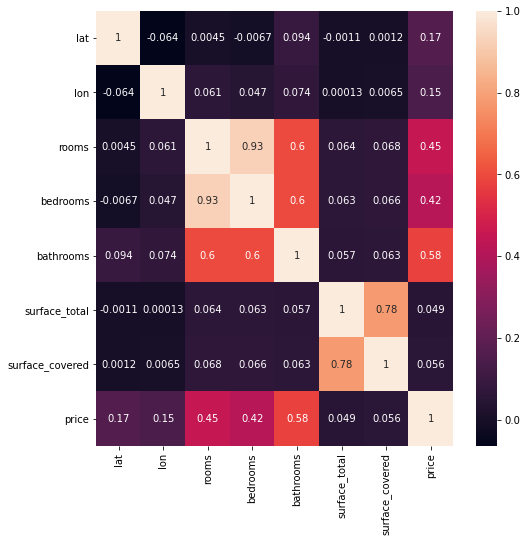

In [53]:
# correlacion de las variables con la variable objetivo:

fig =plt.subplots(figsize=(8,8))
dataset_prob=dataset[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
dataset_prob.head()
sns.heatmap(dataset_prob.corr(), annot=True)

Analizando el gráfico de correlación, se puede observar que el precio está relacionado con la cantidad de baños que tenga la propiedad, tambien los ambientes la cantidad de dormitorios que tenga, la superficie cubierta y la latitud influirán en el valor de la propiedad según dicho gráfico.

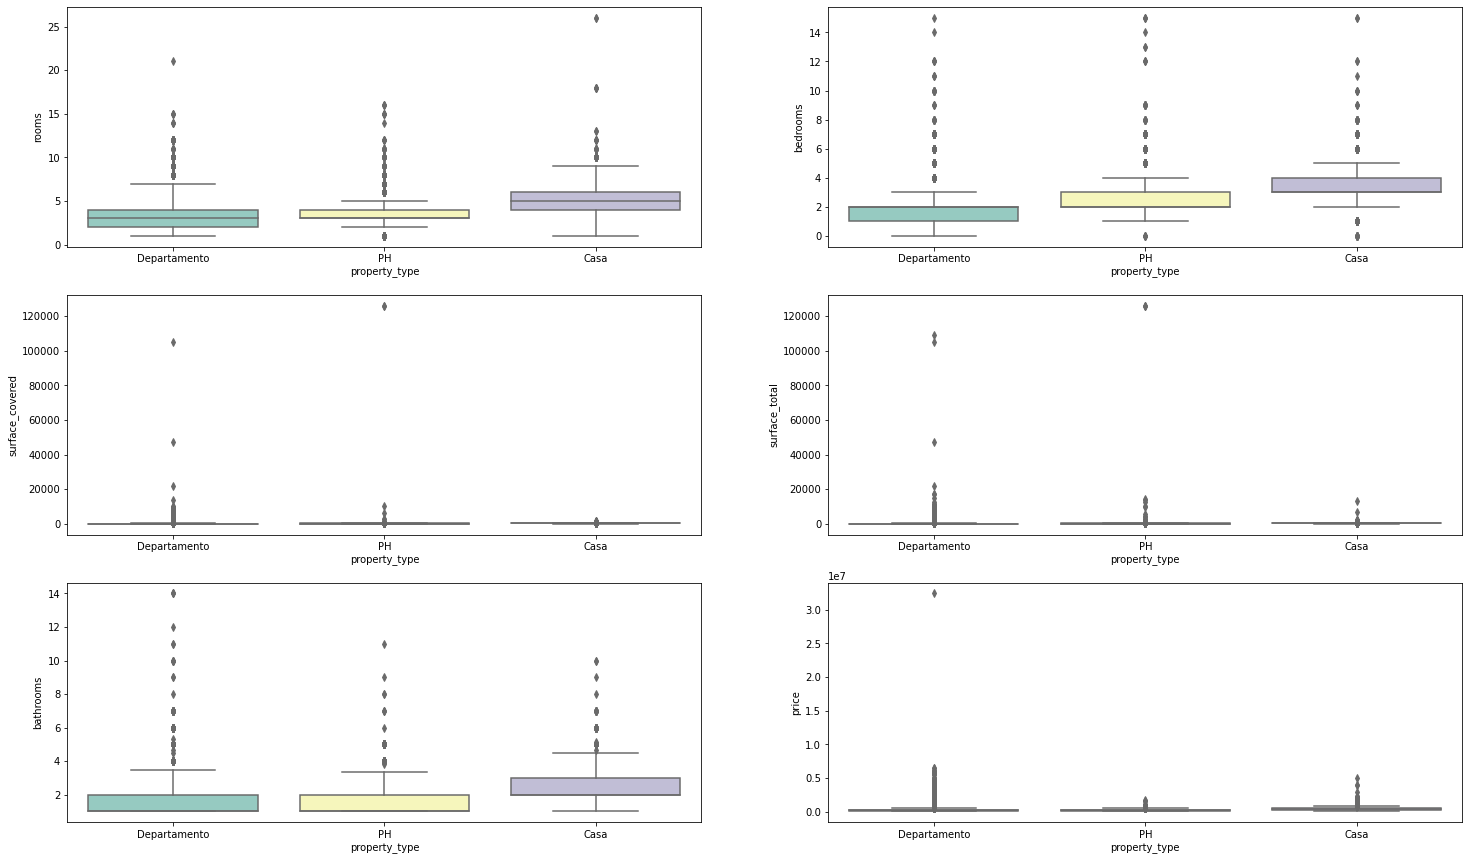

In [54]:
# Graficos boxplot para corroborar la existencia de valores atipicos 

totfig, axs = plt.subplots(nrows=3,ncols=2,figsize=(25,15))
sns.boxplot(x="property_type", y="rooms",data = dataset, palette="Set3", ax=axs[0][0])
sns.boxplot(x="property_type", y="bedrooms",data = dataset, palette="Set3", ax=axs[0][1])
sns.boxplot(x="property_type", y="surface_covered",data = dataset, palette="Set3", ax=axs[1][0])
sns.boxplot(x="property_type", y="surface_total",data = dataset, palette="Set3", ax=axs[1][1])
sns.boxplot(x="property_type", y="bathrooms",data = dataset, palette="Set3", ax=axs[2][0])
sns.boxplot(x="property_type", y="price",data = dataset, palette="Set3", ax=axs[2][1])

Realizando un análisis de los gráficos boxplot, podemos observar que hay valores atípicos en todas las variables,incluso en algunas variables estos valores aplastan el gráfico dificultando su análisis.

Se realizará un tratado de valores atípicos de la siguiente manera:

-Calcular rango intercuartilico,mínimos, máximos.

-Eliminar aquellas propiedades que tengan un precio mayor al máximo y menor al mínimo.

-Se trabajará de manera separada según el tipo de propiedad y de manera sistémica el analísis de las demás variables.

##### Precio de casas, departamentos y PH,

In [55]:
# Valores maximos, minimos y IQR.
for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["price"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["price"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["price"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    print(x)
    print("el precio maximo es {}, el precio minimo es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el precio maximo es 826875.0, el precio minimo es 84810.0 y el IQR 234750.0
-------------------------------------------------------------------
PH
el precio maximo es 471112.5, el precio minimo es 65000.0 y el IQR 134075.0
-------------------------------------------------------------------
Departamento
el precio maximo es 495750.0, el precio minimo es 57000.0 y el IQR 150500.0
-------------------------------------------------------------------


In [56]:
# Trabajo los outliers según el tipo de propiedad por separado.
dptos=dataset[dataset["property_type"]=="Departamento"]
phs=dataset[dataset["property_type"]=="PH"]
casas=dataset[dataset["property_type"]=="Casa"]

##### Los precios que tendán las propiedades con las que continuaremos trabajando deberán ser:
* Si es un departamento, el precio será mayor o igual a 65000 usd o menor a 380000 usd.
* Si es un PH, el precio será mayor o igual a 75000 usd o menor a 440000 usd.
* Si es una casa, el precio será mayor o igual a 110000 usd o menor a 710000 usd.

In [57]:
dptos= dptos[(dptos.price <= 392500.0) & (dptos.price >=65000.0) ]
phs=phs[(phs.price <= 428500.0) & (phs.price >=75000.0) ]
casas=casas[(casas.price <= 706000.0) & (casas.price >=110000.0) ]

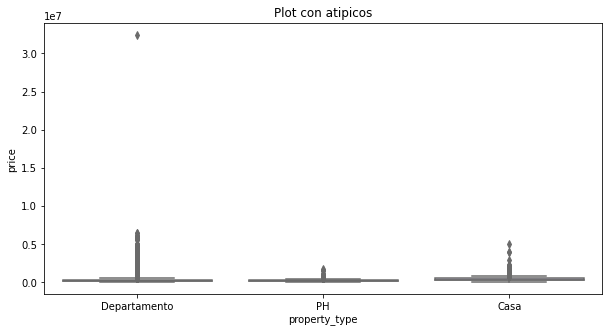

In [58]:
# Comparación a través de un gráfico boxplot de outliers según el tipo de propiedad.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="price",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

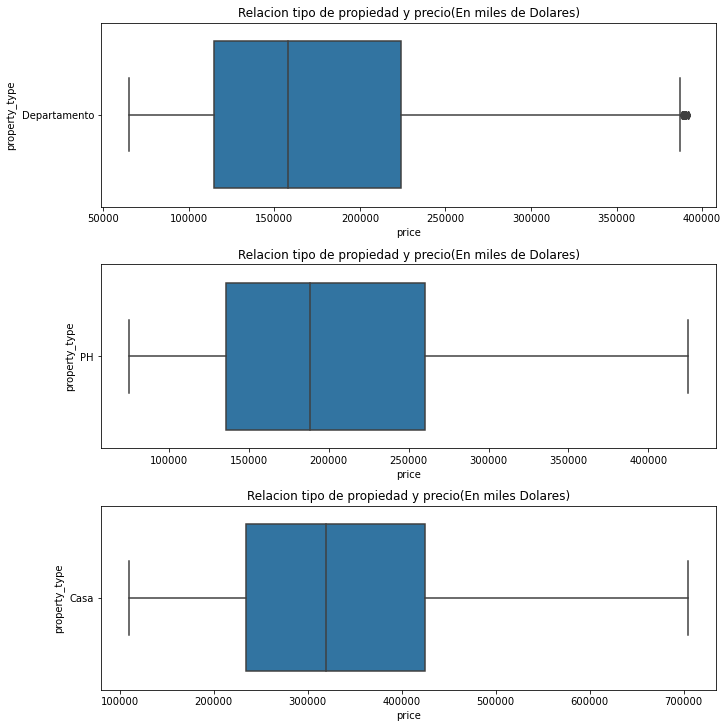

In [59]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y precio(En miles de Dolares)")
ax2.set_title("Relacion tipo de propiedad y precio(En miles de Dolares)")
ax3.set_title("Relacion tipo de propiedad y precio(En miles Dolares)")
sns.boxplot(data=dptos,x="price",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="price",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="price",y="property_type",ax=ax3)
plt.show()

----

#### Rooms

In [60]:
# Cantidad de propiedades con la misma cantidades de habitaciones.
dataset["rooms"].value_counts().sort_index()

1.0      8630
2.0     26511
3.0     27696
4.0     17865
5.0      5330
6.0      1770
7.0       684
8.0       392
9.0        73
10.0       77
11.0       28
12.0       35
13.0        2
14.0        4
15.0        7
16.0        3
18.0        4
21.0        1
26.0        2
Name: rooms, dtype: int64

In [61]:
rooms_min_list=[]
rooms_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["rooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["rooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["rooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    rooms_min_list.append(lim_min)
    rooms_max_list.append(lim_max)
    
    print(x)
    print("el N maximo de habitaciones es {}, el N minimo de habitaciones es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el N maximo de habitaciones es 9.0, el N minimo de habitaciones es 2.0 y el IQR 2.0
-------------------------------------------------------------------
PH
el N maximo de habitaciones es 5.5, el N minimo de habitaciones es 1.3299999999999983 y el IQR 1.0
-------------------------------------------------------------------
Departamento
el N maximo de habitaciones es 7.0, el N minimo de habitaciones es 1.0 y el IQR 2.0
-------------------------------------------------------------------


Algunos numeros no devuelven valores enteros, por lo taanto será conveniente utilizar Ceil para elevar el número al valor entero mas cercano.

In [62]:
import math
# La función "math.floor" redondea los números al número entero más cercano:
for i in rooms_max_list:
    floor_max=math.floor(i)
    print(floor_max)

9
5
7


##### La cantidad de habitaciones que tendán las propiedades con las que continuaremos trabajando deberán tener:
* Si es un departamento, 7 habitaciones como máximo y 1 habitación como mínimo.
* Si es un PH, 8 habitaciones como máximo y 2 habitación como mínimo.
* Si es una casa, 8 habitaciones como máximo y 2 habitación como mínimo.

In [63]:
dptos= dptos[(dptos.rooms <= 4.0) & (dptos.rooms >=1.0) ]
phs=phs[(phs.rooms <= 5.0) & (phs.rooms >=2.0) ]
casas=casas[(casas.rooms <= 6.0) & (casas.rooms >=2.0) ]

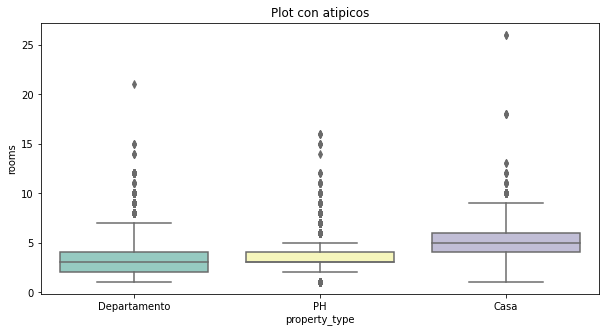

In [64]:
# Comparación a través de un gráfico boxplot de outliers según la cantidad de habitaciones.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="rooms",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

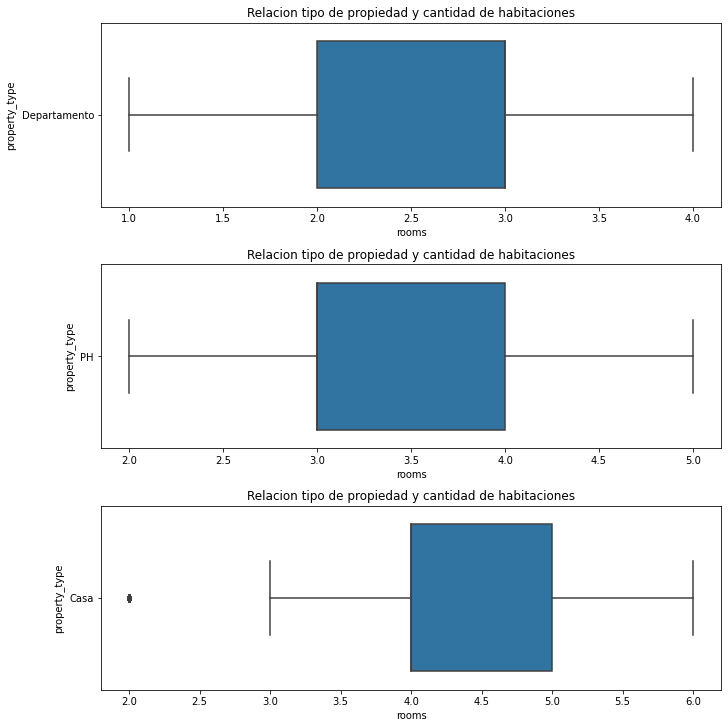

In [65]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax2.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax3.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
sns.boxplot(data=dptos,x="rooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="rooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="rooms",y="property_type",ax=ax3)
plt.show()

---

#### Bathrooms

In [66]:
# Cantidad de propiedades con la misma cantidades de baños.
dataset["bathrooms"].value_counts().sort_index()

1.000000     53771
1.166667       100
1.333333        81
1.500000        58
1.558459      1259
1.666667        43
1.833333        32
2.000000     23012
2.166667        35
2.333333        36
2.500000        12
2.666667        14
2.833333         6
3.000000      7457
3.166667         4
3.333333         8
3.500000         7
3.833333         1
4.000000      2307
4.500000         3
4.666667         2
5.000000       664
5.166667         1
5.333333         1
6.000000       140
7.000000        38
8.000000         4
9.000000         4
10.000000        7
11.000000        3
12.000000        1
14.000000        3
Name: bathrooms, dtype: int64

In [67]:
dataset["bathrooms"] = dataset["bathrooms"].astype("int32")

In [68]:
dataset["bathrooms"].value_counts().sort_index()

1     55344
2     23115
3      7477
4      2312
5       666
6       140
7        38
8         4
9         4
10        7
11        3
12        1
14        3
Name: bathrooms, dtype: int64

In [69]:
bathrooms_min_list=[]
bathrooms_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    bathrooms_min_list.append(lim_min)
    bathrooms_max_list.append(lim_max)
    
    print(x)
    print("el N maximo de baños es {}, el N minimo de baños es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el N maximo de baños es 4.5, el N minimo de baños es 1.0 y el IQR 1.0
-------------------------------------------------------------------
PH
el N maximo de baños es 3.5, el N minimo de baños es 1.0 y el IQR 1.0
-------------------------------------------------------------------
Departamento
el N maximo de baños es 3.5, el N minimo de baños es 1.0 y el IQR 1.0
-------------------------------------------------------------------


In [70]:
# La función "math.floor" redondea los números al número entero más cercano:
for i in bathrooms_max_list:
    floor_max=math.floor(i)
    print(floor_max)

4
3
3


##### La cantidad de habitaciones que tendán las propiedades con las que continuaremos trabajando deberán tener:
* Si es un departamento, 4 baños como máximo y 1 baño como mínimo.
* Si es un PH, 3 baños como máximo y 1 baño como mínimo.
* Si es una casa, 3 baños como máximo y 1 baño como mínimo.

In [71]:
dptos= dptos[(dptos.bathrooms <= 3.0) & (dptos.bathrooms >=1.0) ]
phs=phs[(phs.bathrooms <= 3.0) & (phs.bathrooms >=1.0) ]
casas=casas[(casas.bathrooms <= 4.0) & (casas.bathrooms >=1.0) ]

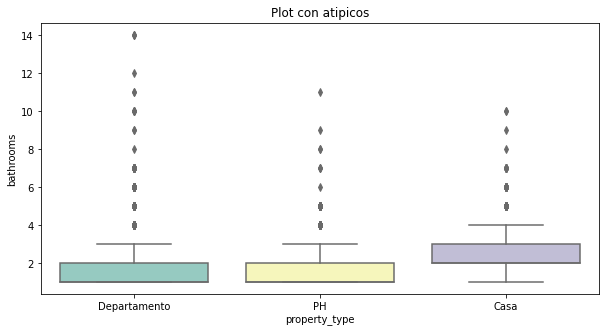

In [72]:
# Comparación a través de un gráfico boxplot de outliers según la cantidad de baños.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="bathrooms",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

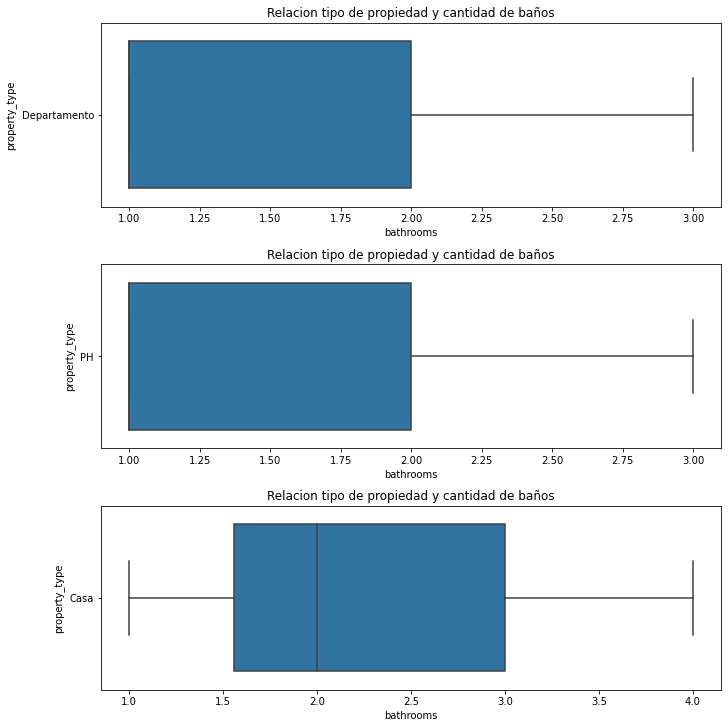

In [73]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y cantidad de baños")
ax2.set_title("Relacion tipo de propiedad y cantidad de baños")
ax3.set_title("Relacion tipo de propiedad y cantidad de baños")
sns.boxplot(data=dptos,x="bathrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bathrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bathrooms",y="property_type",ax=ax3)
plt.show()

---

#### Bedrooms

In [74]:
# Cantidad de propiedades con la misma cantidades de baños.
dataset["bedrooms"].value_counts().sort_index()

0.0      2189
1.0     33166
2.0     28464
3.0     19224
4.0      4711
5.0       796
6.0       305
7.0       174
8.0        33
9.0        16
10.0       13
11.0        4
12.0        9
13.0        2
14.0        2
15.0        6
Name: bedrooms, dtype: int64

In [75]:
dataset["bedrooms"] = dataset["bedrooms"].astype("int32")
dataset["bedrooms"].value_counts().sort_index()

0      2189
1     33166
2     28464
3     19224
4      4711
5       796
6       305
7       174
8        33
9        16
10       13
11        4
12        9
13        2
14        2
15        6
Name: bedrooms, dtype: int64

In [76]:
bedrooms_min_list=[]
bedrooms_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    bedrooms_min_list.append(lim_min)
    bedrooms_max_list.append(lim_max)
    
    print(x)
    print("el N maximo de ambientes es {}, el N minimo de ambientes es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el N maximo de ambientes es 5.5, el N minimo de ambientes es 1.0 y el IQR 1.0
-------------------------------------------------------------------
PH
el N maximo de ambientes es 4.5, el N minimo de ambientes es 1.0 y el IQR 1.0
-------------------------------------------------------------------
Departamento
el N maximo de ambientes es 3.5, el N minimo de ambientes es 0.0 y el IQR 1.0
-------------------------------------------------------------------


In [77]:
# La función "math.floor" redondea los números al número entero más cercano:
for i in bedrooms_max_list:
    floor_max=math.floor(i)
    print(floor_max)

5
4
3


##### La cantidad de dormitorios que tendán las propiedades con las que continuaremos trabajando deberán tener:
* Si es un departamento, 3 ambientes como máximo y 1 ambiente como mínimo.
* Si es un PH, 4 ambientes como máximo y 1 ambiente como mínimo.
* Si es una casa, 5 ambientes como máximo y 1 ambiente como mínimo.

In [78]:
dptos= dptos[(dptos.bedrooms <= 3.0) & (dptos.bedrooms >=0.0) ]
phs=phs[(phs.bedrooms <= 4.0) & (phs.bedrooms >=1.0) ]
casas=casas[(casas.bedrooms <= 5.0) & (casas.bedrooms >=1.0) ]

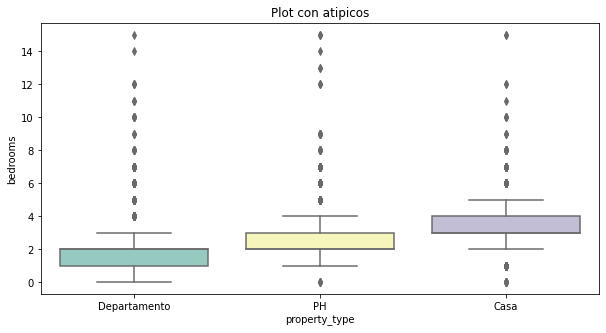

In [79]:
# Comparación a través de un gráfico boxplot de outliers según la cantidad de dormitorios.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="bedrooms",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

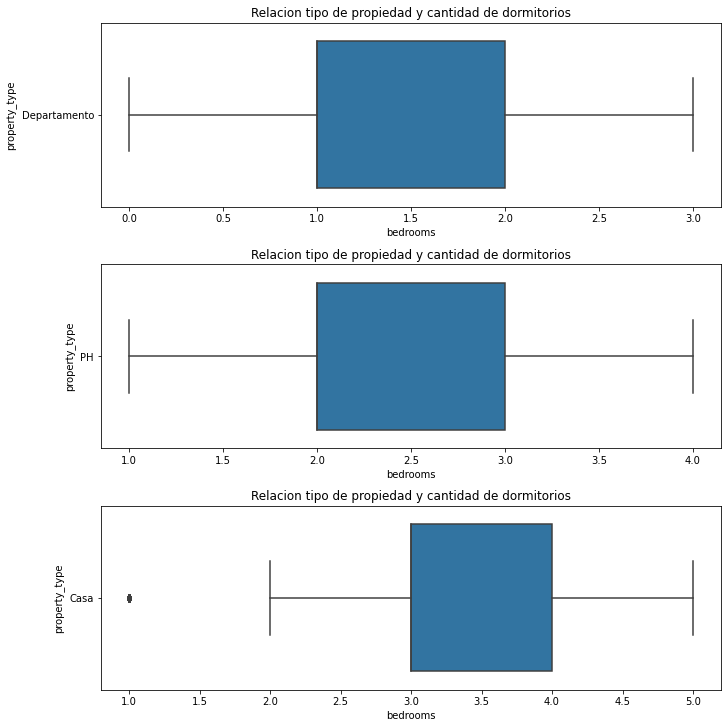

In [80]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y cantidad de dormitorios")
ax2.set_title("Relacion tipo de propiedad y cantidad de dormitorios")
ax3.set_title("Relacion tipo de propiedad y cantidad de dormitorios")
sns.boxplot(data=dptos,x="bedrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bedrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bedrooms",y="property_type",ax=ax3)

plt.show()

---

#### Surface total.

In [81]:
# Cantidad de propiedades con los mismos metros cuadrdos de superficie total.
dataset["surface_total"].value_counts().sort_index()

12.0        1
13.0        2
14.0        5
15.0        6
16.0        9
           ..
21920.0     1
47360.0     1
104890.0    1
108960.0    1
126062.0    3
Name: surface_total, Length: 801, dtype: int64

In [82]:
st_min_list=[]
st_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    st_min_list.append(lim_min)
    st_max_list.append(lim_max)
     
    print(x)
    print("el N maximo de m2 es {}, el N minimo de m2 es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el N maximo de m2 es 583.125, el N minimo de m2 es 56.81 y el IQR 178.75
-------------------------------------------------------------------
PH
el N maximo de m2 es 275.0, el N minimo de m2 es 35.0 y el IQR 82.0
-------------------------------------------------------------------
Departamento
el N maximo de m2 es 182.91666666666669, el N minimo de m2 es 26.0 y el IQR 53.16666666666667
-------------------------------------------------------------------


##### La cantidad de m2 de superficie total que tendán las propiedades con las que continuaremos trabajando deberán tener:
* Si es un departamento, 183 m2 como máximo y 26 m2 como mínimo.
* Si es un PH, 275 m2 como máximo y 35 m2 como mínimo.
* Si es una casa,583.125 m2 como máximo y 56.81 m2 como mínimo.

In [83]:
dptos= dptos[(dptos.bedrooms <= 3.0) & (dptos.bedrooms >=0.0) ]
phs=phs[(phs.bedrooms <= 4.0) & (phs.bedrooms >=1.0) ]
casas=casas[(casas.bedrooms <= 5.0) & (casas.bedrooms >=1.0) ]

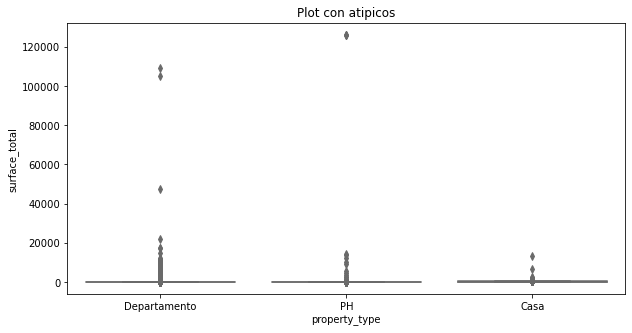

In [84]:
# Comparación a través de un gráfico boxplot de outliers según la cantidad de ambientes.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="surface_total",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

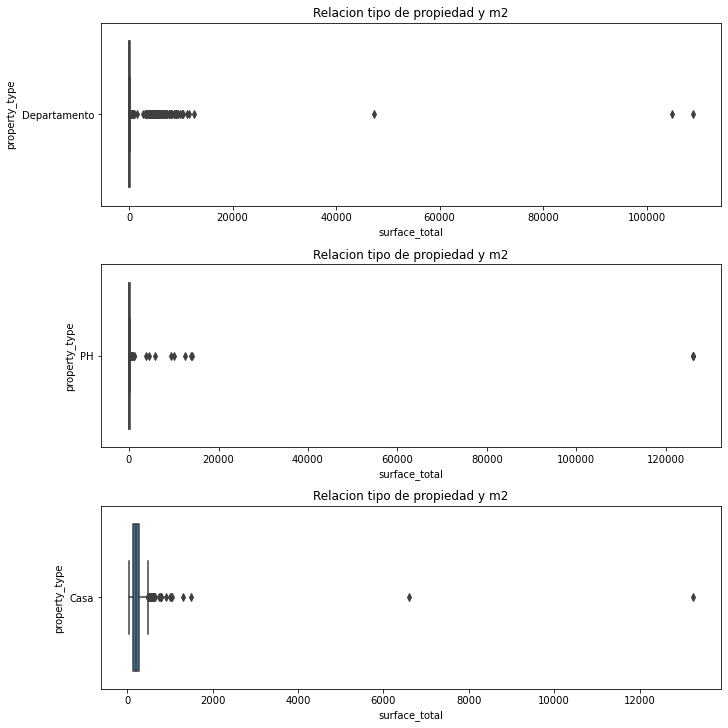

In [85]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y m2")
ax2.set_title("Relacion tipo de propiedad y m2")
ax3.set_title("Relacion tipo de propiedad y m2")
sns.boxplot(data=dptos,x="surface_total",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="surface_total",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="surface_total",y="property_type",ax=ax3)

plt.show()

---

#### Surface_covered.

In [86]:
# Cantidad de propiedades con los mismos metros cuadrdos de superficie cubierta.
dataset["surface_covered"].value_counts().sort_index()

1.0         46
2.0          4
3.0          8
4.0          5
5.0          2
            ..
13857.0      1
21920.0      1
47360.0      1
104890.0     1
126062.0     2
Name: surface_covered, Length: 748, dtype: int64

In [87]:
sc_min_list=[]
sc_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["surface_covered"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["surface_covered"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["surface_covered"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    sc_min_list.append(lim_min)
    sc_max_list.append(lim_max)
     
    print(x)
    print("el N maximo de m2 es {}, el N minimo de m2 es {} y el IQR {}" .format(lim_max,lim_min,IQR))
    print("-------------------------------------------------------------------")

Casa
el N maximo de m2 es 405.0, el N minimo de m2 es 47.333333333333336 y el IQR 114.0
-------------------------------------------------------------------
PH
el N maximo de m2 es 214.5, el N minimo de m2 es 31.0 y el IQR 63.0
-------------------------------------------------------------------
Departamento
el N maximo de m2 es 164.86421525783493, el N minimo de m2 es 25.0 y el IQR 48.34568610313397
-------------------------------------------------------------------


##### La cantidad de m2 de superficie cubierta que tendán las propiedades con las que continuaremos trabajando deberán tener:
* Si es un departamento, 165 m2 como máximo y 49.0 m2 como mínimo.
* Si es un PH, 214.5 m2 como máximo y 31.0 m2 como mínimo.
* Si es una casa, 405.0 m2 como máximo y 48.0 m2 como mínimo.

In [88]:
dptos= dptos[(dptos.surface_covered <= 164.86) & (dptos.surface_covered >=25.0) ]
phs=phs[(phs.surface_covered <= 214.5) & (phs.surface_covered >=31.0) ]
casas=casas[(casas.surface_covered <= 405.0) & (casas.surface_covered >=47.33) ]

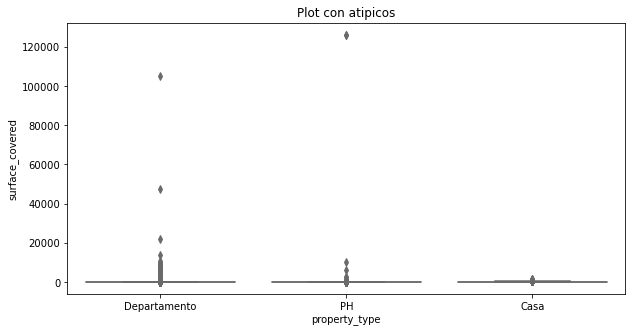

In [89]:
# Comparación a través de un gráfico boxplot de outliers según la cantidad de ambientes.

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="surface_covered",data=dataset, palette="Set3")
ax1.title.set_text('Plot con atipicos')

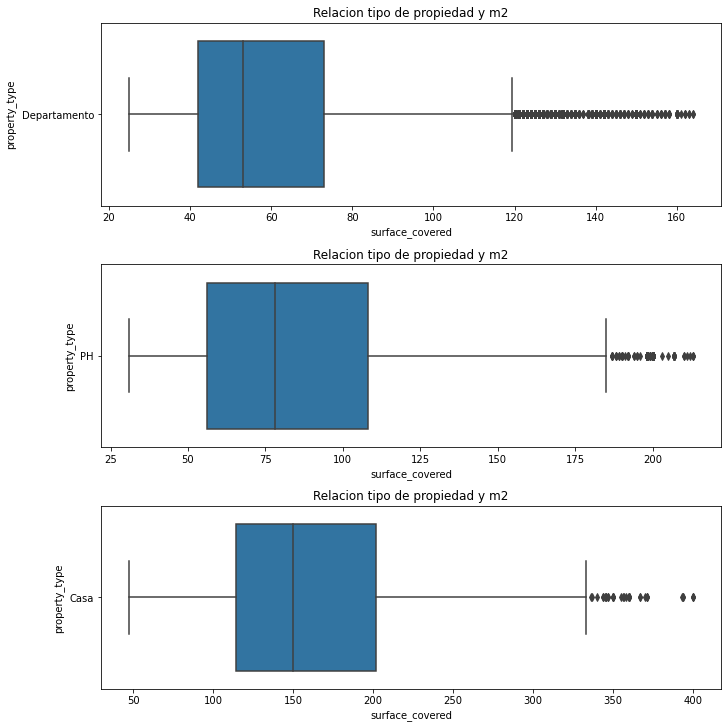

In [90]:
# # Comparación a través de tres gráficos boxplot para verificar si seguimos teniendo outliers según el tipo de propiedad.

figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
ax1.set_title("Relacion tipo de propiedad y m2")
ax2.set_title("Relacion tipo de propiedad y m2")
ax3.set_title("Relacion tipo de propiedad y m2")
sns.boxplot(data=dptos,x="surface_covered",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="surface_covered",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="surface_covered",y="property_type",ax=ax3)

plt.show()

---

In [91]:
conc_1=[dptos,phs,casas]
dataset_prop= pd.concat(conc_1)

In [92]:
dataset_prop

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,Departamento
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,Departamento
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,Departamento
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,Departamento
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,Departamento
...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,Casa
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,Casa
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,Casa
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,Casa


Nuestro dataframe quedó compuesto por 76422 filas y 10 columnas

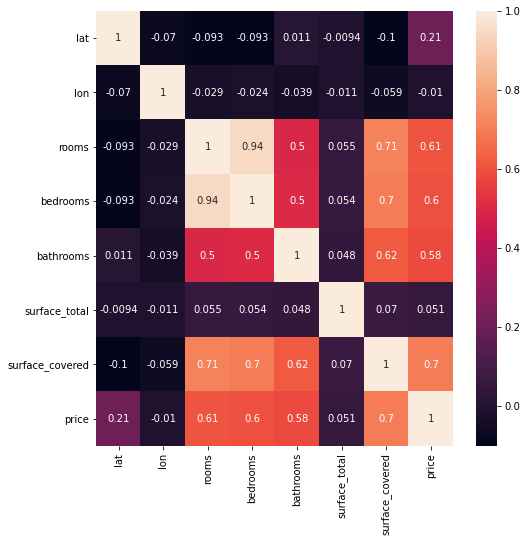

In [93]:
# correlacion de las variables con la variable objetivo:

fig =plt.subplots(figsize=(8,8))
dataset_prob=dataset_prop[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
dataset_prob.head()
sns.heatmap(dataset_prob.corr(), annot=True)

##### Conclusión:
Luego de haber eliminados aquellos valores que por medio de un análisis se llegó a la conclusión de que era un valor atípico, al evaluar nuevamente que variable se correlaciona con el precio, se puede observar que hay una correlación mas fuerte comparandolas con el gráfico anterior, en las variables bathrooms, surface_covered, bedrooms, rooms, lat.

---

### Encoding

In [94]:
dataset_encoding = dataset_prop.copy()

In [95]:
dataset_encoding

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,Departamento
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,Departamento
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,Departamento
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,Departamento
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,Departamento
...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,Casa
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,Casa
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,Casa
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,Casa


In [96]:
# Transformador para codificar valores.
Labelencoder= LabelEncoder()

In [97]:
#Ajuste de Labelcoder.
Labelencoder.fit(dataset_encoding["property_type"])

LabelEncoder()

In [98]:
# agregamos la columna tipo de propiedad y eliminamos property_type.
dataset_encoding["Tipo_propiedad"] = Labelencoder.transform(dataset_encoding["property_type"])
dataset_encoding.drop("property_type",axis=1,inplace=True)

In [99]:
# Etiqueta de cada clase.
list(Labelencoder.classes_)

['Casa', 'Departamento', 'PH']

In [100]:
#Transformar etiquetas en codificación normalizada.
Labelencoder.transform(["Casa", "Departamento", "PH"])

array([0, 1, 2], dtype=int64)

In [101]:
dataset_encoding

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,1
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,1
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,1
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,1
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,1
...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,0
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,0
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,0
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,0


En la columna llamada tipo_propiedad del dataframe, los valores 0 hacen referencia al tipo de propiedad "casa", los valores 1 al tipo de propiedad "departamentos" y los valores 2 a los "PH".

In [102]:
dataset_encoding.shape

(72230, 9)

In [103]:
dataset_encoding.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'Tipo_propiedad'],
      dtype='object')

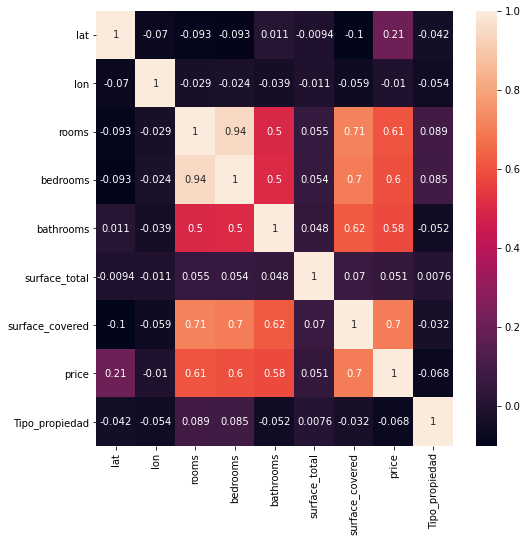

In [104]:
fig =plt.subplots(figsize=(8,8))
dataset_prob=dataset_encoding[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price","Tipo_propiedad"]]
dataset_prob.head()
sns.heatmap(dataset_prob.corr(), annot=True)

---

#### Para el desafio opcional.

In [818]:
data_claus = dataset_encoding.copy()

---

### Escalado de datos.

El escalado se llevará a cabo mediante el minmax.

In [598]:
data_esc = dataset_encoding.copy()

In [599]:
X_proyecto2 = data_esc[["bedrooms","bathrooms","rooms","lat","surface_covered"]]
y_proyecto2 = data_esc[["price"]]

In [600]:
from sklearn import preprocessing

In [601]:
minmax_sc = preprocessing.MinMaxScaler() 

In [602]:
X_train_proyecto2, X_test_proyecto2, y_train_proyecto2, y_test_proyecto2 = train_test_split(X_proyecto2, y_proyecto2 , test_size=0.20, random_state=42)

In [603]:
X_train_proyecto2.shape,X_test_proyecto2.shape

((57784, 5), (14446, 5))

In [604]:
minmax = preprocessing.MinMaxScaler() 

X_train_proyecto2 =minmax.fit_transform(X_train_proyecto2)
X_test_proyecto2 =minmax.transform(X_test_proyecto2)

In [605]:
y_train_proyecto2 =minmax.fit_transform(y_train_proyecto2)
y_test_proyecto2 =minmax.transform(y_test_proyecto2)

In [606]:
X_train_proyecto2

array([[0.6       , 0.66666667, 0.6       , 0.57640645, 0.14666667],
       [0.2       , 0.        , 0.2       , 0.60986886, 0.096     ],
       [0.4       , 0.33333333, 0.4       , 0.4995776 , 0.09333333],
       ...,
       [0.4       , 0.33333333, 0.4       , 0.67931282, 0.16      ],
       [0.2       , 0.        , 0.2       , 0.58430378, 0.056     ],
       [0.4       , 0.        , 0.4       , 0.59647459, 0.048     ]])

In [607]:
y_train_proyecto2

array([[0.24251969],
       [0.17390236],
       [0.21259843],
       ...,
       [0.24409449],
       [0.14173228],
       [0.13385827]])

---

#### Con nuetro dataset listo, se llevarán a cabo los sigueintes análisis:
-Se realizará una comparación entre el modelo desarrollado en el proyecto N°1 (específicamente con el modelo Decision Tree Regressor) , con los datos procesados de dicho proyecto y el mismo modelo con los datos procesados del proyecto N°2 (la comparación será con Gridserch y sin Gridserch).

-Llevaremos a cabo 3 modelos diferentes( Random Forest, XGboost) y los compararemos con los modelos del punto descripto anteriormente

-Se evaluará cual de todos los modelos es el más adecuado para nuetro trabajo.

#### Comparación entre el modelo del sprint 1 y el mismo modelo con los datos preprocesados del sprint 2.

In [608]:
# Realiazaremos un cuasi procesado como en el sprint n°1 para poder realizar la comparacion con del mismo modelo con los datos del 2.

datos_proyecto_1 = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/Data-science/DS_Proyecto_01_Datos_Properati.csv")

In [609]:
# Seleccion de variables iniciales
datos_con_variables_seleccionadas =  datos_proyecto_1[["bathrooms","rooms","surface_total","surface_covered","price","bedrooms"]]

In [610]:
datos_con_variables_seleccionadas

,bathrooms,rooms,surface_total,surface_covered,price,bedrooms
0,2.0,7.0,140.0,140.0,153000.0,7.0
1,2.0,2.0,70.0,58.0,159000.0,1.0
2,1.0,2.0,45.0,45.0,125000.0,1.0
3,1.0,2.0,85.0,50.0,295000.0,1.0
4,1.0,2.0,50.0,35.0,40000.0,1.0
...,...,...,...,...,...,...
146655,1.0,2.0,54.0,48.0,165000.0,1.0
146656,2.0,4.0,164.0,90.0,130000.0,3.0
146657,1.0,1.0,50.0,35.0,73000.0,1.0
146658,1.0,2.0,38.0,38.0,68000.0,1.0


In [611]:
datos_sin_valores_faltantes = datos_con_variables_seleccionadas.dropna()

In [612]:
datos_sin_valores_faltantes

,bathrooms,rooms,surface_total,surface_covered,price,bedrooms
0,2.0,7.0,140.0,140.0,153000.0,7.0
1,2.0,2.0,70.0,58.0,159000.0,1.0
2,1.0,2.0,45.0,45.0,125000.0,1.0
3,1.0,2.0,85.0,50.0,295000.0,1.0
4,1.0,2.0,50.0,35.0,40000.0,1.0
...,...,...,...,...,...,...
146655,1.0,2.0,54.0,48.0,165000.0,1.0
146656,2.0,4.0,164.0,90.0,130000.0,3.0
146657,1.0,1.0,50.0,35.0,73000.0,1.0
146658,1.0,2.0,38.0,38.0,68000.0,1.0


---

In [613]:
# Variables de nuestro proyecto n°1
X_proyecto1 = datos_sin_valores_faltantes[["surface_total","bathrooms","rooms"]]
y_proyecto1 = datos_sin_valores_faltantes[["price"]]

In [614]:
# Estas particiones son para la comparación de los resultados obtenidos en el proyecto 1. Adicionalmente, la segunda partición nos servirá para entrenar los diferentes modelos avanzados

X_train_proyecto1, X_test_proyecto1, y_train_proyecto1, y_test_proyecto1 = train_test_split(X_proyecto1, y_proyecto1, test_size=0.20, random_state=42)

In [615]:
 X_test_proyecto2

array([[0.4       , 0.33333333, 0.4       , 0.92890786, 0.11733333],
       [0.2       , 0.        , 0.2       , 0.61780201, 0.02666667],
       [0.2       , 0.        , 0.2       , 0.59281665, 0.02133333],
       ...,
       [0.4       , 0.        , 0.4       , 0.887569  , 0.06933333],
       [0.4       , 0.        , 0.4       , 0.7329886 , 0.10133333],
       [0.2       , 0.        , 0.2       , 0.57337362, 0.04533333]])

In [616]:
y_train_proyecto2

array([[0.24251969],
       [0.17390236],
       [0.21259843],
       ...,
       [0.24409449],
       [0.14173228],
       [0.13385827]])

---

#### Decision Tree - Datos Proyecto 1 sin GridSearch

In [617]:
# Vamos a escoger el modelo de regresion DecisionTreeRegressor.
arbol_proyecto1 = DecisionTreeRegressor()

In [618]:
# Entrenamos: tree
arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

DecisionTreeRegressor()

In [619]:
arbol_proyecto1.score(X_train_proyecto1,y_train_proyecto1)

0.813694775853183

In [620]:
arbol_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

0.5514365671097872

#### Decision Tree - Datos pre-procesados - Proyecto 2 sin GridSearch

In [621]:
# Vamos a escoger el modelo de regresion DecisionTreeRegressor.
arbol_proyecto2 = DecisionTreeRegressor()

In [622]:
# Entrenamos: tree
arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

DecisionTreeRegressor()

In [623]:
arbol_proyecto2.score(X_train_proyecto2,y_train_proyecto2)

0.9852818168039419

In [624]:
arbol_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

0.7490568317609796

Al realiazar la comparacion entre ambos modelos sin la utilizacion de Grid Serch, otenemos un mejor resultado en el modelo del proyecto n°2. Sin embargo un resultado tan alto en el entrenamiento puede ser indicio de overfitting.

#### Decision Tree - Datos Proyecto 1 con GridSearch

##### parámetros que elegiste para optimizar y el rango de cada uno.
* max_depth = 2,3,4,5,
* min_samples_split = 2,3,4
* min_samples_leaf = 0.1,0.2,0.3

In [625]:
# PARAMETROS PARA AMBOS ARBOLES
parametros_de_arbol_regresion = {"max_depth":[2,3,4,5],
                                 "min_samples_split":[2,3,4],
                                 "min_samples_leaf":[0.1,0.2,0.3]}

In [626]:
# Vamos a escoger el modelo de regresion DecisionTreeRegressor.
arbol_proyecto1 = DecisionTreeRegressor()

In [627]:
# ESTRATEGIA 1: Grid Search
gridsearch_arbol_proyecto1 = GridSearchCV(arbol_proyecto1, parametros_de_arbol_regresion, cv = 3)

In [628]:
#### Entrenamos: tree con la grilla definida arriba 
gridsearch_arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'min_samples_split': [2, 3, 4]})

In [629]:
mejor_modelo_proyecto1 = gridsearch_arbol_proyecto1.best_estimator_
mejor_resultado_proyecto1 = gridsearch_arbol_proyecto1.best_score_

In [630]:
#Estimador que fue elegido por la búsqueda, es decir, estimador que dio la puntuación más alta 
mejor_modelo_proyecto1

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1)

In [631]:
y_predicciones_entrenamiento1 = mejor_modelo_proyecto1.predict(X_train_proyecto1)
y_predicciones_pruebas1= mejor_modelo_proyecto1.predict(X_test_proyecto1)

In [632]:
# Error cuadrático medio del proyecto 2.
resultados_train_p1 = mean_squared_error(y_train_proyecto1, y_predicciones_entrenamiento1)
resultados_test_p1 = mean_squared_error(y_test_proyecto1, y_predicciones_pruebas1)

In [633]:
resultados_train_p1

68550456438.69642

In [634]:
resultados_test_p1

45941024509.41301

In [635]:
y_train_proyecto1.shape

(98254, 1)

In [636]:
y_test_proyecto1.shape

(24564, 1)

In [637]:
y_predic_entrenamiento1 = y_predicciones_entrenamiento1 .reshape(98254,1)
y_predic_pruebas1= y_predicciones_pruebas1.reshape(24564,1)

Raíz del error cuadrático medio en Train: 261821.4208935098
Raíz del error cuadrático medio en Test: 214338.57447835425


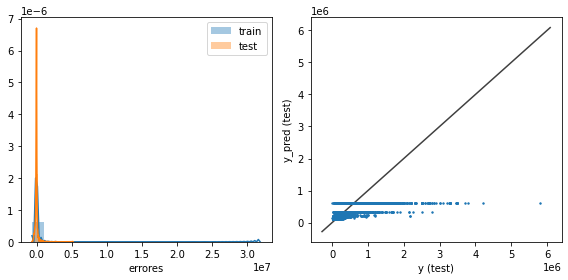

In [638]:
 #Raíz del error cuadrático medio para train y test.
rmse_train = np.sqrt(mean_squared_error(y_train_proyecto1, y_predic_entrenamiento1))
rmse_test = np.sqrt(mean_squared_error(y_test_proyecto1, y_predic_pruebas1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
#graficamos ambos modelos comparando los errores.
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_proyecto1 - y_predic_entrenamiento1, bins = 20, label = 'train')
sns.distplot(y_test_proyecto1 - y_predic_pruebas1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_proyecto1, y_predic_pruebas1, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()
    

#### Decision Tree - Datos pre-procesados - Proyecto 2  con GridSearch

In [639]:
# Vamos a escoger el modelo de regresion DecisionTreeRegressor.
arbol_proyecto2 = DecisionTreeRegressor()

In [640]:
# ESTRATEGIA 2: Grid Search
gridsearch_arbol_proyecto2 = GridSearchCV(arbol_proyecto2, parametros_de_arbol_regresion, cv = 3)

In [641]:
# Entrenamos: tree con la grilla definida arriba 
gridsearch_arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'min_samples_split': [2, 3, 4]})

In [642]:
# Mejores estimadores y el promedio de puntuación.
mejor_modelo_proyecto2 = gridsearch_arbol_proyecto2.best_estimator_
mejor_resultado_proyecto2 = gridsearch_arbol_proyecto2.best_score_

In [643]:
#Estimador que fue elegido por la búsqueda, es decir, estimador que dio la puntuación más alta 
mejor_modelo_proyecto2

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, min_samples_split=3)

In [644]:
mejor_resultado_proyecto2 

0.5299097910357957

In [645]:
y_train_proyecto2.shape

(57784, 1)

In [646]:
y_test_proyecto2.shape

(14446, 1)

In [647]:
# Predicción para verificar el error cuadrático medio.
y_predicciones_entrenamiento = mejor_modelo_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas= mejor_modelo_proyecto2.predict(X_test_proyecto2)

In [648]:
# Error cuadrático medio del proyecto 2.
resultados_train_p2 = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento)
resultados_test_p2 = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas)

In [649]:
resultados_train_p2

0.007569147560328336

In [650]:
resultados_test_p2

0.0073289829647627544

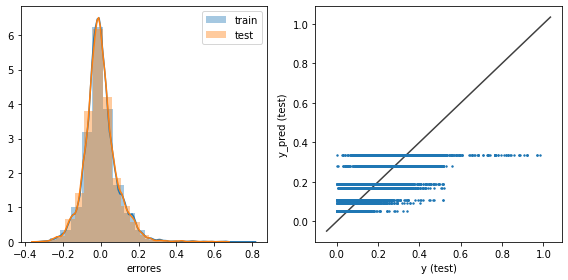

In [651]:

    #graficamos ambos modelos comparando los errores.
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_proyecto2 - y_predic_entrenamiento2, bins = 20, label = 'train')
sns.distplot(y_test_proyecto2 - y_predic_pruebas2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_proyecto2, y_predic_pruebas2, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()
    

Comparación entre el proyecto 1 y el proyecto 2 

In [652]:
mejor_resultado_proyecto2

0.5299097910357957

In [653]:
mejor_resultado_proyecto1

0.283099446199002

##### Conclusión:

Luego de realizar una búsqueda exhaustiva de valores de parámetros especificados para un estimador y  analizando las puntuaciones obtenidas de los mejores estimadores, se pudo llegar a la conclusión de que el modelo n°2 arroja un mejor resultado comparandolo con el modelo N°1, tanto en el la puntuación del mejor modelo como en mean squared error. 

Las causas que permitieron obtener un mejor modelo que el N°1, se dieron a un pre procesado diferente del dataset, dónde se trabajo detectando valores outliers, realizando una imputación de valores faltantes, escalado de los valores y así poder obtener un dataset mas normalizado, con un sesgo menor entre los datos.

Trabajar los datos como se explicó en el párrafo anterior nos dió como resultado que las variables que se relacionaban con el precio eran diferentes a las seleccionadas para llevar el modelo del proyecto N°1. Este resultado fue positivo ya que se logró mejorar el desempeño del modelo.

---

#### Modelos Avanzados
##### Los modelos que se llevarán a cabo serán:
* Random Forest
* XGBOOST

#### Random Forest

In [654]:
from sklearn.ensemble import RandomForestRegressor

In [655]:
#selección del modelo.
rf_modelo =RandomForestRegressor(random_state=42)

In [656]:
# ajustamos el modelo
rf_modelo.fit(X_train_proyecto2 , y_train_proyecto2)

<ipython-input-656-bce25e2351f6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_modelo.fit(X_train_proyecto2 , y_train_proyecto2)


RandomForestRegressor(random_state=42)

In [657]:
# Puntuacion  de entrenamiento y prueba.
y_train_pred_rf= rf_modelo.predict(X_train_proyecto2)
y_test_pred_rf = rf_modelo.predict(X_test_proyecto2)

rmse_train_rf = np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_rf))

print("RMSE en Train es:",rmse_train_rf)
print("RMSE en Test es:",rmse_test_rf)

RMSE en Train es: 0.024285703841456244
RMSE en Test es: 0.05321671532837783


#### Random Forest con GridSerch.

##### parámetros que elegiste para optimizar y el rango de cada uno.
* n_estimators = 100, 120, 140, 160
* criterion = mse 
* max_depth = 3, 6, 9, 12, 15, None
* min_samples_split = 2, 4, 6, 8
* min_samples_leaf = 1, 3, 5, 7

In [658]:
parametros_random_forest_regressor = {
    'n_estimators' : [100, 120, 140, 160], #default 100
    'criterion' : ['mse'], # mse
    'max_depth' : [3, 6, 9, 12, 15, None], # None
    'min_samples_split' : [2, 4, 6, 8], # 2
    'min_samples_leaf' : [1, 3, 5, 7], # 1
    #'min_weight_fraction_leaf' : [0.0, 0.5] # 0.0
}

In [659]:
# Seleccionamos el moodelo Random Forest.
random_forest = RandomForestRegressor(random_state=42)

In [660]:
grid_random_forest = GridSearchCV(random_forest, parametros_random_forest_regressor, cv = 3)

In [661]:
y_train_proyecto2.shape

(57784, 1)

In [662]:
y_test_proyecto2.shape

(14446, 1)

In [663]:
y_train_proyecto2.reshape(57784)

array([0.24251969, 0.17390236, 0.21259843, ..., 0.24409449, 0.14173228,
       0.13385827])

In [664]:
grid_random_forest.fit(X_train_proyecto2,y_train_proyecto2.reshape(57784))

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['mse'],
                         'max_depth': [3, 6, 9, 12, 15, None],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 120, 140, 160]})

In [665]:
print("Mejores parametros: "+str(grid_random_forest.best_params_))
print("Mejor Score: "+str(grid_random_forest.best_score_)+'\n')

Mejores parametros: {'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Mejor Score: 0.8052125673330023



In [666]:
# ¿Cúal fué el mejor modelo que se obtuvo realizando GridSerch y cúal es el mejor resultado que obtenemos?
mejor_modelo_random_forest_proyecto2 = grid_random_forest.best_estimator_
mejor_resultado_random_forest_proyecto2 = grid_random_forest.best_score_

In [667]:
mejor_modelo_random_forest_proyecto2

RandomForestRegressor(n_estimators=160, random_state=42)

* El mejor modelo deberá tener una profundidad máxima de 9 y una cantidad de árboles de 120. El número mínimo de muestras necesarias para estar en un nodo hoja será 5 y el número mínimo de muestras necesarias para dividir un nodo interno será 4.

In [668]:
mejor_resultado_random_forest_proyecto2

0.8052125673330023

In [669]:
y_predicciones_entrenamiento_randomf = mejor_modelo_random_forest_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_randomf = mejor_modelo_random_forest_proyecto2.predict(X_test_proyecto2)

In [670]:
# Error cuadrático  medio.
resultados_random_entrenamiento = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_randomf)
resultados_random_pruebas = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_randomf)

In [673]:
resultados_random_entrenamiento

0.0005841732898648401

In [674]:
resultados_random_pruebas

0.002821241619983171

#### Realizaremos un ajuste de hiperparametros "a mano"

In [675]:
random_for = RandomForestRegressor(max_depth=12, n_estimators = 140)

In [676]:
random_for.fit(X_train_proyecto2, y_train_proyecto2)

<ipython-input-676-52d28a15cc27>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_for.fit(X_train_proyecto2, y_train_proyecto2)


RandomForestRegressor(max_depth=12, n_estimators=140)

In [677]:
y_predicciones_entrenamiento_random = random_for.predict(X_train_proyecto2)
y_predicciones_pruebas_random = random_for.predict(X_test_proyecto2)

In [678]:
resultados_random_entrenamientom = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_random)
resultados_random_pruebasm = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_random)

In [679]:
resultados_random_entrenamientom

0.002857003699209143

In [680]:
resultados_random_pruebasm

0.0036172392283455833

In [681]:
y_predicciones_entrenamiento_r= y_predicciones_entrenamiento_randomf .reshape(57784,1)
y_predicciones_pruebas_r = y_predicciones_pruebas_randomf  .reshape(14446,1)

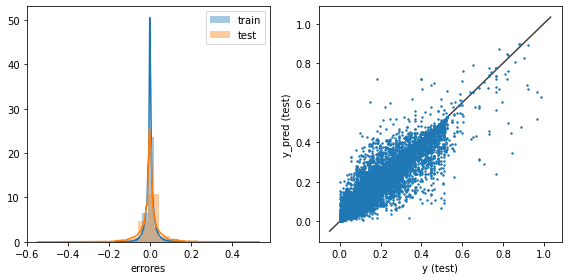

In [682]:
#graficamos ambos modelos comparando los errores.
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train_proyecto2 - y_predicciones_entrenamiento_r, bins = 20, label = 'train')
sns.distplot(y_test_proyecto2 - y_predicciones_pruebas_r, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_proyecto2,y_predicciones_pruebas_r, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

* No se obtuvo resultados positivos llevando a cabo un ajuste de hiperparámetros a mano.

---

#### XGBOOST

In [688]:
import xgboost as xgb

In [689]:
#Implementación sin grid search
xgboost_regressor = xgb.XGBRegressor(random_state=42)

In [690]:
# Ajuste del modelo.
xgboost_regressor.fit ( X_train_proyecto2 , y_train_proyecto2 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [691]:
print('Training score: {}'.format(xgboost_regressor.score(X_train_proyecto2, y_train_proyecto2)))
print('Test score: {}'.format(xgboost_regressor.score(X_test_proyecto2, y_test_proyecto2)))

Training score: 0.8080107797469511
Test score: 0.7684330449236518


#### XGBOOST utilizando GridSerch.

##### parámetros que elegiste para optimizar y el rango de cada uno.
* n_estimators = 10,20,30,40,50,120
* reg_lambda = 0.1,0.2,0.3
* gamma = 0.1,0.2,0.3 
* max_depth = 2,3,4,5

In [692]:
parametros_xgb_regressor = {
    'n_estimators':[10,20,30,40,50,120], 
    'reg_lambda':[0.1,0.2,0.3], 
    'gamma':[0.1,0.2,0.3],
    'max_depth':[2,3,4,5]
}

In [693]:
#Implementación con grid search
xgboost_reg = xgb.XGBRegressor(random_state=42)

In [694]:
gridsearch_xgboost_proyecto2 = GridSearchCV(xgboost_reg, parametros_xgb_regressor, cv = 3)

In [695]:
# Ajuste del modelo.
gridsearch_xgboost_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [701]:
# ¿Cúal es el mejor modelo y resultado que obtenemos?
mejor_modelo_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_estimator_
mejor_resultado_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_score_

In [702]:
mejor_modelo_xgboost_proyecto2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=0.3, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [703]:
mejor_resultado_xgboost_proyecto2

0.712188125021708

In [704]:
print('Training score: {}'.format(gridsearch_xgboost_proyecto2.score(X_train_proyecto2, y_train_proyecto2)))
print('Test score: {}'.format(gridsearch_xgboost_proyecto2.score(X_test_proyecto2, y_test_proyecto2)))

Training score: 0.7248330127206459
Test score: 0.7191172028048138


In [705]:
y_predicciones_entrenamiento_xg = mejor_modelo_xgboost_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_xg = mejor_modelo_xgboost_proyecto2.predict(X_test_proyecto2)

In [706]:
# Error cuadrático medio del modelo.
resultados_boost_entrenamiento = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_xg)
resultados_boost_pruebas = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_xg)

In [707]:
resultados_boost_entrenamiento

0.004498582093909275

In [708]:
resultados_boost_pruebas

0.004515849848716365

In [709]:
y_predic_trainXG =y_predicciones_entrenamiento_xg .reshape(57784,1)
y_predic_testXG=y_predicciones_pruebas_xg .reshape(14446,1)

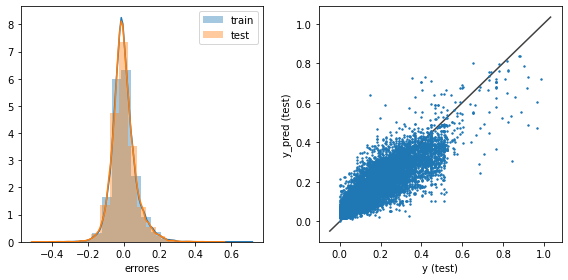

In [710]:
#graficamos ambos modelos comparando los errores.
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train_proyecto2 - y_predic_trainXG, bins = 20, label = 'train')
sns.distplot(y_test_proyecto2 - y_predic_testXG, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_proyecto2,y_predic_testXG, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

---

#### Conclusión:
Se llevarón a cabo 2 tipos de técnicas de aprendizaje supervisado.Los modelos elegidos para realizar la comparación con Decision Tree Regressor fueron Random Forest y XGBoost.

Cuando se llevó a cabo la comparación de Random Forest y XGBoost, al momento de realizar un análisis de los resultados obtenidos, ambos modelos mejoraron los resultados, comparándolos con los resultados obtenidos con el modelo Decisíon Tree Regressor.

Comparación con best_score_

* Con modelo Decisión Tree Regressor obtenemos un resultado de 0.529 .
* Con el modelo Random Forest obtenemos un resultado de 0.805.
* Con el modelo XGBoost obtenemos un resultado de  0.712.

Comparación del error entre los 3 modelos:

Decision tree:
* Train = 0.007569147560328336
* Test =0.007328982964762755

Random Forest:
* Train = 0.0005841732898648401
* Test = 0.002821241619983171

XGBOOST:
* Train = 0.004498582093909275
* Test = 0.004515849848716365
  
Con Random Forest y con el modelo XGBoost, obtenemos un mejor resultado. Al comparar el RMSE de ambos modelos decir que con Random Forest obtenemos un error menor que con XGBOOST

Para llevar a cabo nuestro trabajo, Random Fores es el algoritmo indicaado. 

---

#### ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?

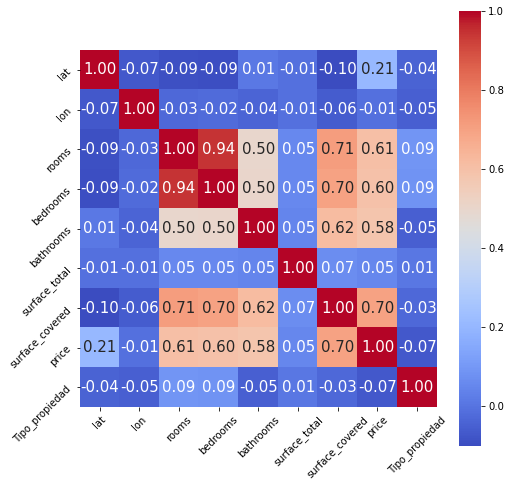

In [711]:
corr =dataset_encoding.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= dataset_encoding.columns, 
           yticklabels=dataset_encoding.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Las variables que fueron relevantes para llevar a cabo el modelo que facilite la tasación de las propiedades, son:
* Rooms
* Bathrooms
* Bedrooms
* surface_covered
* lat

Según el processamiento que se realizó de los datos, las variables que no fueron relevantes para llevar a cabo el modelo que facilite la tasación de las propiedades, son:
* Surface_total
* lon

#### Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes.

##### Importancia de cada atributo.

In [712]:
len(mejor_modelo_random_forest_proyecto2.estimators_)

160

In [713]:
# get importance
importance = mejor_modelo_random_forest_proyecto2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01926
Feature: 1, Score: 0.03900
Feature: 2, Score: 0.02963
Feature: 3, Score: 0.29450
Feature: 4, Score: 0.61760


In [714]:
importance

array([0.01926494, 0.0390026 , 0.02962598, 0.29450222, 0.61760426])

* Feature: 0 = lon
* Feature: 1 = rooms
* Feature: 2 = bedrooms
* Feature: 3 = bathrooms
* Feature: 4 = surface_covered

#### Gráficos:

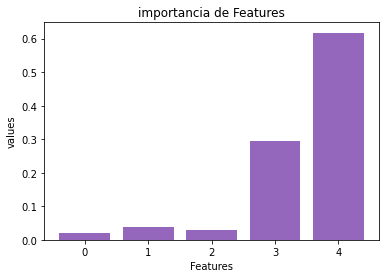

In [715]:
importancia = mejor_modelo_random_forest_proyecto2.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

En el gráfico anteriror se puede observar que la característica mas importante del modelo es surface_covered (superficie cubierta que tenga la propiedad), luego bathrooms (cantidad de baños que tenga la propiedad) y con un valor similar de importancia entre las variables, rooms, lat y bedrooms.

---

#### Observación de árboles al azar.

##### A continuación se volverá a entrenar el modelo elegido para nuestro trabajo (Random Forest), pero ésta vez cambiando el valor del hiperparámetro max_depth con 45 y 80.

##### Prueba 1 con el valor del hiperparámetro max_depth = 45

In [716]:
rf = RandomForestRegressor(max_depth=45, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=120)

In [717]:
rf.fit ( X_train_proyecto2 , y_train_proyecto2 )

<ipython-input-717-112a492336f5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit ( X_train_proyecto2 , y_train_proyecto2 )


RandomForestRegressor(max_depth=45, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=120)

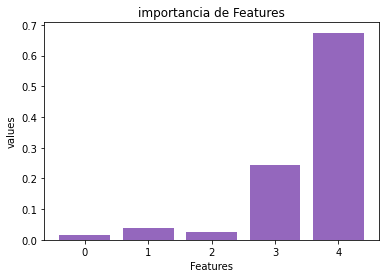

In [718]:
importancia = rf.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

In [719]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01567
Feature: 1, Score: 0.03963
Feature: 2, Score: 0.02683
Feature: 3, Score: 0.24346
Feature: 4, Score: 0.67442


In [720]:
print('Training score: {}'.format(rf.score(X_train_proyecto2, y_train_proyecto2)))
print('Test score: {}'.format(rf.score(X_test_proyecto2, y_test_proyecto2)))

Training score: 0.8720521884428521
Test score: 0.8031235722844163


---

##### Prueba 2 con el valor del hiperparámetro max_depth = 80

In [721]:
rf_2 = RandomForestRegressor(max_depth=80, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=120)

In [722]:
rf_2.fit(X_train_proyecto2 , y_train_proyecto2)

<ipython-input-722-f1d7069669c0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_2.fit(X_train_proyecto2 , y_train_proyecto2)


RandomForestRegressor(max_depth=80, min_samples_leaf=5, min_samples_split=4,
                      n_estimators=120)

In [723]:
# get importance
importance = rf_2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01615
Feature: 1, Score: 0.03974
Feature: 2, Score: 0.02659
Feature: 3, Score: 0.24405
Feature: 4, Score: 0.67345


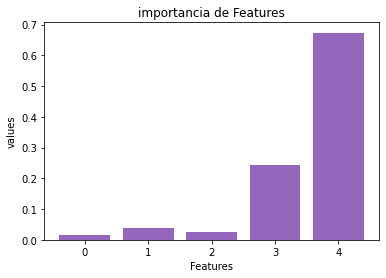

In [724]:
importancia = rf_2.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

In [725]:
print('Training score: {}'.format(rf_2.score(X_train_proyecto2, y_train_proyecto2)))
print('Test score: {}'.format(rf_2.score(X_test_proyecto2, y_test_proyecto2)))

Training score: 0.8716589491452309
Test score: 0.8030482272378301


##### Conclusión:
Al seleccionar distintos bosques al azar, pudimos observar que toma casi de igual manera dos características de manera importante, tanto surface_covered y bathrooms en ambos casos y como de menor importancia lon, bedrooms y rooms.

La diferencias entre esos árboles, es la profundidad máxima de cada árbol. Usando el parámetro max_depth , puedo limitar hasta qué profundidad quiero que crezca cada árbol en mi bosque aleatorio.

####  ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Al comenzar el tratamiento de datos de un manera diferente al proyecto número 1, tenía la impresión de que iba a obtener mejores resultado al realizar mi modelo. 

Haber realizado una limpieza de aquellas propiedades con un precio atípico, haber imputado valores ausentes y realizar un escalado que me ayude a normaizar la base de datos con la que se trabajé fueron los motivos del resultado obtenido. 

No esperaba trabajar con variables independientes diferentes a las del proyecto 1, en particular con las variables lat y surface_covered, es obvio que haber realizado un tratamiento de datos como anteriormente se mencionó fueron los motivos de esa causa, aunque el resultado obtenido fue mejor de lo que se esperaba.


#### ¿Cómo es la distribución de errores (regresión) ¿Dónde falla? ¿A qué se debe?

In [726]:
# Predicción para verificar el error cuadrático medio.
y_predict_train_error = mejor_modelo_random_forest_proyecto2.predict(X_train_proyecto2)
y_predic_test_error= mejor_modelo_random_forest_proyecto2.predict(X_test_proyecto2)

In [727]:
#rom sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train_proyecto2,y_predict_train_error)
rmse_test = mean_squared_error(y_test_proyecto2, y_predic_test_error)

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


Raíz del error cuadrático medio en Train: 0.0005841732898648401
Raíz del error cuadrático medio en Test: 0.002821241619983171


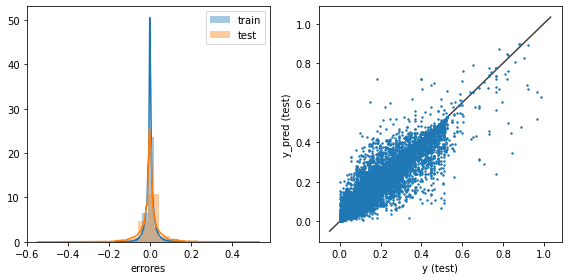

In [728]:
#graficamos ambos modelos comparando los errores.
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train_proyecto2 - y_predicciones_entrenamiento_r, bins = 20, label = 'train')
sns.distplot(y_test_proyecto2 - y_predicciones_pruebas_r, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_proyecto2,y_predicciones_pruebas_r, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()
    

Al realizar un análisis del RMSE, se puede observar que el modelo se encuentra balanceado, ésto se debe a que la diferencia entre el error en train y test son cercanos.

Que el RMSE sea muy parecido para train y para test, nos da indicio de que es un buen modelo para aplicar a nuestro trabajo, sin embargo, al analizar el error en train podemos decir que es un modelo de bajo sesgo pero al analizar el error en test, el modelo sufre un poco de varianza. Una solución simple sería la de agregar datos,utilizar regularizacion,Disminuir la complejidad del modelo, para de esta manera disminuir la varianza

Obeservado el gráfico, también podemos confirmar que es un modelo con heterocedasticidad, ya que la varianza de los errores no es constante en todas las observaciones realizadas, a mayor varianza, el error es mayor.

Comparando el RMSE entre Random Forest y XGBOOST, parece que el modelo XGBOOST parece un modelo mas balanceado, sin embargo podemos determinar que es un modelo con alto sesgo y alta varianza.

Tendriamos que analizar con gente que nos brinde mas información del negocio y que nos ayuden a determinar si el resultado obtenido es un resultado óptimo en train. En caso de así serlo, estamos ante la presencia de un modelo con sesgo inevitable, es decir que no se podrá reducir y nos servirá de base para detectar el sesgo evitable

En el caso ed la varianza, estamos ante una varianza inevitable, es decir que siempre podra ser reducida a costa de afectar el sesgo.

Otra solución que pienso es la de agregar variables que nos brinden mas información, como por ejemplo:
* Si tiene pileta o no.
* Si la propiedad está ubicada en un barrio cerrado o no.
* Si en la torre dónde se encuantran los departamentos tienen ascensor o no.
* Si hay escuelas cerca de la propiedad.
* Si hay avenidas cerca.
* Calificar del 1 al 5 el nivel de inseguridad del barrio ( siendo 5 el más alto)

---

---

#### Desafio opcional.

In [819]:
data_claus = dataset_encoding.copy()

In [820]:
data_claus

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,1
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,1
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,1
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,1
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,1
...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,0
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,0
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,0
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,0


In [821]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

##### Aplicaremos K-means, para que el clustering  sea efectivo trabajaremoscon la menor cantidad de varibes posibles.

Para averiguar que zonas se parecen mas entre si, trabajaremos con las variables lat y lon.

In [822]:
l_means = data_claus[["lat","lon"]]
l_means

,lat,lon
11,-34.603683,-58.381557
12,-34.630349,-58.417223
20,-34.608246,-58.444262
22,-34.626240,-58.462078
23,-34.625611,-58.462403
...,...,...
145556,-34.591847,-58.452262
145557,-34.647912,-58.504446
145608,-34.569280,-58.478443
145610,-34.579296,-58.451458


In [823]:
# Entrenamos un modelo para cada numero de cluster que queremos testear
K_clusters = range(1,10)
# Definimos y entrenamos el modelo
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
y_lat = data_claus[['lat']]
X_lon = data_claus[['lon']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]

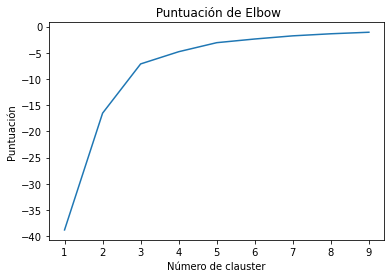

In [824]:
# Visualización.
plt.plot(K_clusters, score)
plt.xlabel('Número de clauster')
plt.ylabel('Puntuación')
plt.title(' Puntuación de Elbow')
plt.show()

En el gráfico podemos observar el codo en 3.

In [825]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
#agrupación en clústeres de k-medias.
kmeans.fit(l_means[l_means.columns[0:2]]) 
l_means['cluster_label'] = kmeans.fit_predict(l_means[l_means.columns[0:2]])
# Coordenadas de los centros de clústeres
centers = kmeans.cluster_centers_ 
# Etiquetas de cada punto
labels = kmeans.predict(l_means[l_means.columns[0:2]]) 
l_means.head()

<ipython-input-825-da71b8956246>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_means['cluster_label'] = kmeans.fit_predict(l_means[l_means.columns[0:2]])


,lat,lon,cluster_label
11,-34.603683,-58.381557,2
12,-34.630349,-58.417223,9
20,-34.608246,-58.444262,0
22,-34.626240,-58.462078,4
23,-34.625611,-58.462403,4


#### ¿qué barrios se parecen más entre sí?

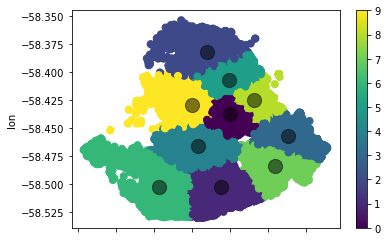

In [826]:
data_claus.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [827]:
#número de conglomerados que se formarán y el número de centroides que se generarán.
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(data_claus[data_claus.columns[0:2]])
data_claus['claus_barrio'] = kmeans.fit_predict(data_claus[data_claus.columns[0:2]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(data_claus[data_claus.columns[0:2]])
data_claus

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad,claus_barrio
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,1,3
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,1,4
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,1,1
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,1,7
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,1,7
...,...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,0,1
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,0,0
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,0,6
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,0,9


#### Claster según el tipo de propiedad.

Se tendrá en cuenta la superficie total y la cantidad de ambientes que tenga la propiedad

In [828]:
# Entrenamos un modelo para cada numero de cluster que queremos testear
clusters = range(1,10)
# Definimos y entrenamos el modelo
kmeans = [KMeans(n_clusters=i) for i in clusters]
y_lat = data_claus[['rooms']]
X_lon = data_claus[['surface_total']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]

<ipython-input-828-9d840d03aefb>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
<ipython-input-828-9d840d03aefb>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
<ipython-input-828-9d840d03aefb>:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]


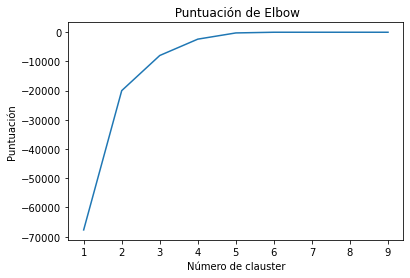

In [829]:
# Visualización.
plt.plot(K_clusters, score)
plt.xlabel('Número de clauster')
plt.ylabel('Puntuación')
plt.title(' Puntuación de Elbow')
plt.show()

In [830]:
claus_prop = data_claus[["rooms","bedrooms","bathrooms","surface_total","surface_covered","Tipo_propiedad"]]
claus_prop                    

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Tipo_propiedad
11,2.0,1.0,1.0,68.000000,59.0,1
12,2.0,1.0,1.0,50.000000,44.0,1
20,2.0,1.0,1.0,31.000000,31.0,1
22,2.0,1.0,1.0,45.000000,45.0,1
23,2.0,1.0,1.0,45.000000,45.0,1
...,...,...,...,...,...,...
145556,3.0,3.0,2.0,160.000000,86.0,0
145557,4.0,3.0,2.0,205.000000,125.0,0
145608,6.0,4.0,3.0,212.166667,250.0,0
145610,4.0,4.0,1.0,162.000000,63.0,0


In [831]:
#número de conglomerados que se formarán y el número de centroides que se generarán
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(claus_prop[claus_prop.columns[0:6]]) 
data_claus['clust_prop'] = kmeans.fit_predict(claus_prop[claus_prop.columns[0:6]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(claus_prop[claus_prop.columns[0:6]]) 
data_claus.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad,claus_barrio,clust_prop
11,-34.603683,-58.381557,2.0,1.0,1.0,68.0,59.0,149000.0,1,3,5
12,-34.630349,-58.417223,2.0,1.0,1.0,50.0,44.0,115000.0,1,4,5
20,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0,75000.0,1,1,5
22,-34.626240,-58.462078,2.0,1.0,1.0,45.0,45.0,95000.0,1,7,5
23,-34.625611,-58.462403,2.0,1.0,1.0,45.0,45.0,95000.0,1,7,5


In [832]:
data_claus

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tipo_propiedad,claus_barrio,clust_prop
11,-34.603683,-58.381557,2.0,1.0,1.0,68.000000,59.0,149000.0,1,3,5
12,-34.630349,-58.417223,2.0,1.0,1.0,50.000000,44.0,115000.0,1,4,5
20,-34.608246,-58.444262,2.0,1.0,1.0,31.000000,31.0,75000.0,1,1,5
22,-34.626240,-58.462078,2.0,1.0,1.0,45.000000,45.0,95000.0,1,7,5
23,-34.625611,-58.462403,2.0,1.0,1.0,45.000000,45.0,95000.0,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...
145556,-34.591847,-58.452262,3.0,3.0,2.0,160.000000,86.0,220000.0,0,1,7
145557,-34.647912,-58.504446,4.0,3.0,2.0,205.000000,125.0,175000.0,0,0,7
145608,-34.569280,-58.478443,6.0,4.0,3.0,212.166667,250.0,550000.0,0,6,7
145610,-34.579296,-58.451458,4.0,4.0,1.0,162.000000,63.0,395000.0,0,9,0


---

#### PCA

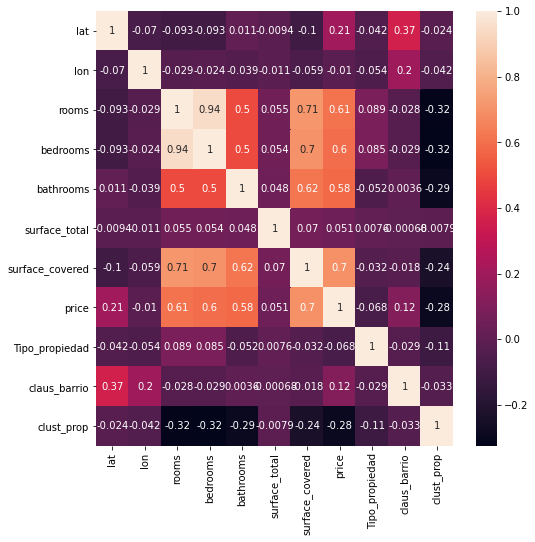

In [833]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(data_claus.corr(), annot=True)

In [834]:
#Eliminamos las variables lat y lon
data_claus.drop(["lat","lon"],axis=1,inplace=True)

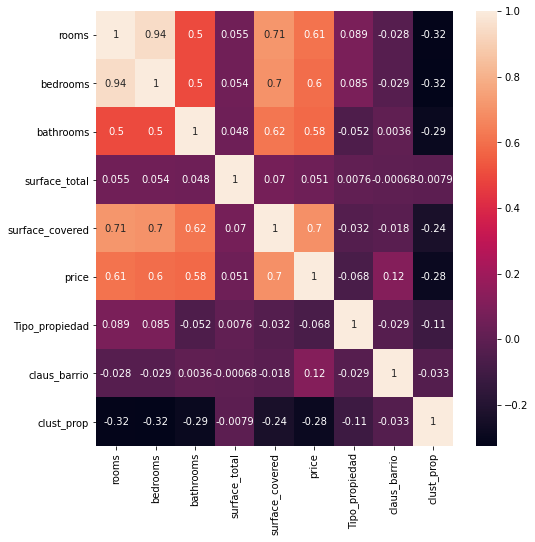

In [835]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(data_claus.corr(), annot=True)

In [836]:
X_pca=data_claus.drop("price",axis=1)
y_pca=data_claus["price"]

In [837]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y_pca,test_size=0.3,random_state=42)

##### Aplicación de Standar Scaler

In [838]:
st_Scaler = preprocessing.StandardScaler() 

X_train_pca=st_Scaler.fit_transform(X_train_pca)
X_test_pca=st_Scaler.transform(X_test_pca)

In [839]:
X_train_pca

array([[ 0.33372974,  0.31741043, -0.6055388 , ..., -0.23082431,
        -0.55619107,  0.54590492],
       [ 1.36456298,  1.50224534, -0.6055388 , ..., -0.23082431,
         0.77813442, -1.49813574],
       [ 0.33372974,  0.31741043,  1.23782652, ..., -0.23082431,
         0.11097167, -1.49813574],
       ...,
       [ 0.33372974,  0.31741043,  1.23782652, ..., -0.23082431,
         1.11171579, -1.49813574],
       [-0.6971035 , -0.86742448, -0.6055388 , ..., -0.23082431,
        -1.22335382,  0.54590492],
       [ 0.33372974,  0.31741043, -0.6055388 , ..., -0.23082431,
         1.11171579,  0.54590492]])

In [840]:
X_test_pca

array([[ 0.33372974,  0.31741043,  1.23782652, ..., -0.23082431,
         0.11097167, -1.49813574],
       [-0.6971035 , -0.86742448, -0.6055388 , ..., -0.23082431,
        -1.22335382,  0.54590492],
       [-0.6971035 , -0.86742448, -0.6055388 , ..., -0.23082431,
        -1.22335382,  0.54590492],
       ...,
       [ 0.33372974,  0.31741043,  3.08119184, ..., -0.23082431,
         0.11097167, -1.49813574],
       [ 1.36456298,  1.50224534,  3.08119184, ..., -0.23082431,
         1.11171579, -1.49813574],
       [-0.6971035 , -0.86742448, -0.6055388 , ..., -0.23082431,
        -0.55619107,  0.54590492]])

In [841]:
pca_p=PCA

for i in range(2,9):
    pca =PCA(n_components=i,random_state=42)
    X_train_new=pca.fit_transform(X_train_pca)
    X_test_new=pca.transform(X_test_pca)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train_pca)
    
    y_pred = tree.predict(X_test_new)
    r2 = metrics.r2_score(y_test_pca, y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test_pca,y_pred))
    print("----------------------------------------")
    print("modelo:",i)
    print("R2 segun el tipo de estrategia:",r2)
    print("RMSE segun el tipo de estrategia:",RMSE)
    print("----------------------------------------")

----------------------------------------
modelo: 2
R2 segun el tipo de estrategia: 0.6701327826321903
RMSE segun el tipo de estrategia: 46186.0167354331
----------------------------------------
----------------------------------------
modelo: 3
R2 segun el tipo de estrategia: 0.6825025190077476
RMSE segun el tipo de estrategia: 45311.77468260627
----------------------------------------
----------------------------------------
modelo: 4
R2 segun el tipo de estrategia: 0.6870491450207299
RMSE segun el tipo de estrategia: 44986.16805460865
----------------------------------------
----------------------------------------
modelo: 5
R2 segun el tipo de estrategia: 0.6975955150670032
RMSE segun el tipo de estrategia: 44221.66029340551
----------------------------------------
----------------------------------------
modelo: 6
R2 segun el tipo de estrategia: 0.6957668033161596
RMSE segun el tipo de estrategia: 44355.16820102603
----------------------------------------
--------------------------

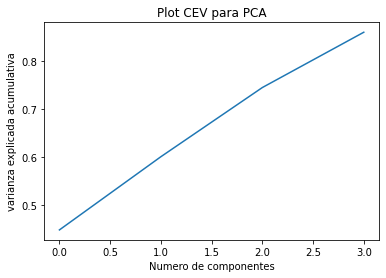

In [842]:
pca_t4 = PCA(4).fit(X_test_pca)
plt.plot(np.cumsum(pca_t4.explained_variance_ratio_))
plt.title("Plot CEV para PCA")
plt.xlabel('Numero de componentes')
plt.ylabel('varianza explicada acumulativa');

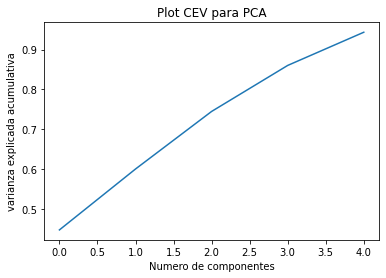

In [844]:
pca_t5 = PCA(5).fit(X_test_pca)
plt.plot(np.cumsum(pca_t5.explained_variance_ratio_))
plt.title("Plot CEV para PCA")
plt.xlabel('Numero de componentes')
plt.ylabel('varianza explicada acumulativa');

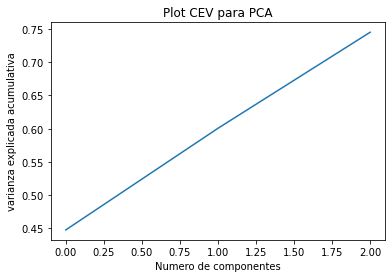

In [845]:
pca_t3 = PCA(3).fit(X_test_pca)
plt.plot(np.cumsum(pca_t3.explained_variance_ratio_))
plt.title("Plot CEV para PCA")
plt.xlabel('Numero de componentes')
plt.ylabel('varianza explicada acumulativa');

 #### Aplicación del pca con 3

In [850]:
# n_componentes = componentes a conservar(3)
pca_n=PCA(n_components=3,random_state=42)
X_train_pca=pca_n.fit_transform(X_train_pca)
X_test_pca=pca_n.transform(X_test_pca)


tree = DecisionTreeRegressor(max_depth=10,random_state=42)
tree.fit(X_train_pca,y_train_pca)
    
y_pred = tree.predict(X_test_pca)
r2 = metrics.r2_score(y_test_pca, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test_pca,y_pred))
print("----------------------------------------")
print("R2 segun el tipo de estrategia:",r2)
print("RMSE segun el tipo de estrategia:",RMSE)
print("----------------------------------------")

----------------------------------------
R2 segun el tipo de estrategia: 0.6825025190077476
RMSE segun el tipo de estrategia: 45311.77468260627
----------------------------------------
